# DATA

# CO DATA

In [66]:
import pandas as pd
import scipy.io
import numpy as np
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
mat = scipy.io.loadmat('COfinal.mat')
#cardio_df = pd.DataFrame(mat)

len(mat['COfinal'])
L_COfinal=[]
for i in range(len(mat['COfinal'])):
    L_COfinal.append(list(mat['COfinal'][i]))

CO_data=pd.DataFrame(L_COfinal,columns=['Lab1', 'Lab2','Lab3','Lab4','Temp','RH','Ref','Time'])
Time=CO_data['Time'].to_list()
Time=np.array(Time)
Date=pd.to_datetime(Time-719529,unit='d').round('h')
CO_data['Date'] = Date.tolist()
CO_data=CO_data.set_index('Date')
CO_data.drop('Time',axis = 1, inplace = True)

mat = scipy.io.loadmat('CO_raw.mat')
L_CO_raw=[]
for i in range(len(mat['CO_raw'])):
    L_CO_raw.append(list(mat['CO_raw'][i]))

CO_raw=pd.DataFrame(L_CO_raw,columns=['WE', 'AE','Temp','RH','Time'])


CO_data.insert(loc = 0,
          column = 'WE',
          value = CO_raw['WE'].to_list())

CO_data.insert(loc = 1,
          column = 'AE',
          value = CO_raw['AE'].to_list())
CO_data=CO_data.interpolate()

WE=np.array(CO_data['WE'].to_list())
AE=np.array(CO_data['AE'].to_list())
Signal=list(WE-AE)
CO_data.insert(loc = 2,
          column = 'Signal',
          value = Signal)

CO_data.head()

WE          AE      Signal         Lab1  \
Date                                                                    
2019-10-02 12:00:00  1023.970000   39.543125  984.426875  3571.592599   
2019-10-02 13:00:00  1023.970000   40.757143  983.212857  3534.556213   
2019-10-02 16:00:00  1023.970000   40.073881  983.896119  3714.254704   
2019-10-02 17:00:00   941.693433  209.369701  732.323731  2296.396571   
2019-10-03 16:00:00   488.950000  320.808571  168.141429   555.780140   

                            Lab2         Lab3        Lab4       Temp  \
Date                                                                   
2019-10-02 12:00:00  2272.635909  1941.086340  618.283953  26.378438   
2019-10-02 13:00:00  2261.997806  1938.583211  609.013503  25.502791   
2019-10-02 16:00:00  2291.131285  1939.991999  679.326053  30.827910   
2019-10-02 17:00:00  1639.208945  1421.286044  497.011998  30.047164   
2019-10-03 16:00:00   390.151856   258.023564 -445.692120  29.441429   

                            RH         Ref  
Date                                        
2019-10-02 12:00:00  58.063437  206.858886  
2019-10-02 13:00:00  59.868837  261.703907  
2019-10-02 16:00:00  49.008060  268.918360  
2019-10-02 17:00:00  51.259851  319.195427  
2019-10-03 16:00:00  52.018571  280.104590

## NO2 DATA

In [67]:
import pandas as pd
import scipy.io
import numpy as np
mat = scipy.io.loadmat('NO2final.mat')
#cardio_df = pd.DataFrame(mat)

len(mat['NO2final'])
L_NO2final=[]
for i in range(len(mat['NO2final'])):
    L_NO2final.append(list(mat['NO2final'][i]))

NO2_data=pd.DataFrame(L_NO2final,columns=['Lab1', 'Lab2','Lab3','Lab4','Temp','RH','Ref','Time'])
Time=NO2_data['Time'].to_list()
Time=np.array(Time)
Date=pd.to_datetime(Time-719529,unit='d').round('h')
NO2_data['Date'] = Date.tolist()
NO2_data=NO2_data.set_index('Date')
NO2_data.drop('Time',axis = 1, inplace = True)

mat = scipy.io.loadmat('NO2_raw.mat')

L_NO2_raw=[]
for i in range(len(mat['NO2_raw'])):
    L_NO2_raw.append(list(mat['NO2_raw'][i]))

NO2_raw=pd.DataFrame(L_NO2_raw,columns=['WE', 'AE','Temp','RH','Time'])
NO2_raw.head()
NO2_data.insert(loc = 0,
          column = 'WE',
          value = NO2_raw['WE'].to_list())

NO2_data.insert(loc = 1,
          column = 'AE',
          value = NO2_raw['AE'].to_list())


NO2_data=NO2_data.interpolate()
WE=np.array(NO2_data['WE'].to_list())
AE=np.array(NO2_data['AE'].to_list())
Signal=list(WE-AE)
NO2_data.insert(loc = 2,
          column = 'Signal',
          value = Signal)
NO2_data.head()


WE          AE     Signal         Lab1  \
Date                                                                  
2019-10-02 12:00:00  157.696563  149.846563   7.850000   460.448301   
2019-10-02 13:00:00    0.586429   39.937143 -39.350714  1186.045510   
2019-10-02 16:00:00   17.601343   40.504328 -22.902985  1293.158435   
2019-10-02 17:00:00  190.049701  180.774030   9.275672   219.575228   
2019-10-03 16:00:00  226.502857  202.540000  23.962857    86.725922   

                          Lab2        Lab3         Lab4       Temp         RH  \
Date                                                                            
2019-10-02 12:00:00  11.259601  -54.281210  -844.685734  26.378438  58.063437   
2019-10-02 13:00:00 -64.843326 -173.647930 -1383.373409  25.502791  59.868837   
2019-10-02 16:00:00  11.194037 -180.488333 -1212.985070  30.827910  49.008060   
2019-10-02 17:00:00  -6.131452  -65.833055  -658.643041  30.047164  51.259851   
2019-10-03 16:00:00  23.809224  -16.484097  -552.026071  29.441429  52.018571   

                           Ref  
Date                            
2019-10-02 12:00:00   9.613288  
2019-10-02 13:00:00  15.181394  
2019-10-02 16:00:00  13.091546  
2019-10-02 17:00:00  18.506848  
2019-10-03 16:00:00  14.396420

In [68]:
def MBE(true,pred):
    true=np.array(true)
    pred=np.array(pred)
    mbe=np.mean(true-pred)
    return mbe
def CRMSE(true,pred):
    true=np.array(true)
    pred=np.array(pred)
    crmse=np.sqrt(np.mean(((true-np.mean(true))-(pred-np.mean(pred)))**2))
    if np.std(pred)>np.std(true):
        crmse=crmse
    else:
        crmse=-crmse
    return crmse
    

##  SO2 DATA

In [69]:
import pandas as pd
import scipy.io
import numpy as np
mat = scipy.io.loadmat('So2final.mat')

L_SO2final=[]
for i in range(len(mat['SO2final'])):
    L_SO2final.append(list(mat['SO2final'][i]))

SO2_data=pd.DataFrame(L_SO2final,columns=['Lab1', 'Lab2','Lab3','Lab4','Temp','RH','Ref','Time'])
Time=SO2_data['Time'].to_list()
Time=np.array(Time)
Date=pd.to_datetime(Time-719529,unit='d').round('h')
SO2_data['Date'] = Date.tolist()
SO2_data=SO2_data.set_index('Date')
SO2_data.drop('Time',axis = 1, inplace = True)

mat = scipy.io.loadmat('SO2_raw.mat')

L_SO2_raw=[]
for i in range(len(mat['SO2_raw'])):
    L_SO2_raw.append(list(mat['SO2_raw'][i]))

SO2_raw=pd.DataFrame(L_SO2_raw,columns=['WE', 'AE','Temp','RH','Time'])
SO2_raw.head()
SO2_data.insert(loc = 0,
          column = 'WE',
          value = SO2_raw['WE'].to_list())

SO2_data.insert(loc = 1,
          column = 'AE',
          value = SO2_raw['AE'].to_list())


SO2_data=SO2_data.interpolate()
WE=np.array(SO2_data['WE'].to_list())
AE=np.array(SO2_data['AE'].to_list())
Signal=list(WE-AE)
SO2_data.insert(loc = 2,
          column = 'Signal',
          value = Signal)

SO2_data.head()

WE          AE      Signal        Lab1  \
Date                                                                  
2019-10-02 12:00:00  511.980000  375.956250  136.023750  336.491001   
2019-10-02 13:00:00  511.980000  508.330476    3.649524 -339.232168   
2019-10-02 16:00:00  511.980000  442.351642   69.628358  -77.358106   
2019-10-02 17:00:00  435.447463  352.494627   82.952836  221.907307   
2019-10-03 16:00:00  358.812857  336.112857   22.700000   84.566512   

                           Lab2        Lab3         Lab4       Temp  \
Date                                                                  
2019-10-02 12:00:00  395.131511  258.535708  -624.848616  26.378438   
2019-10-02 13:00:00  -68.687897 -313.588071  -619.380130  25.502791   
2019-10-02 16:00:00  108.340330 -219.979244  -680.245645  30.827910   
2019-10-02 17:00:00  244.067240  121.645425  -897.011152  30.047164   
2019-10-03 16:00:00   77.784764  -11.080530 -1118.485141  29.441429   

                            RH       Ref  
Date                                      
2019-10-02 12:00:00  58.063437  1.701245  
2019-10-02 13:00:00  59.868837  1.495635  
2019-10-02 16:00:00  49.008060  1.102313  
2019-10-02 17:00:00  51.259851  1.383004  
2019-10-03 16:00:00  52.018571  1.402984

# O3  DATA

In [70]:
import pandas as pd
import scipy.io
import numpy as np
mat= scipy.io.loadmat('O3.mat')
L_O3final=[]
for i in range(len(mat['O3final_1'])):
    L_O3final.append(list(mat['O3final_1'][i]))

O3_data=pd.DataFrame(L_O3final,columns=['Lab1', 'Lab2','Lab3','Lab4','Temp','RH','Ref','Time'])
Time=O3_data['Time'].to_list()
Time=np.array(Time)
Date=pd.to_datetime(Time-719529,unit='d').round('h')
O3_data['Date'] = Date.tolist()
O3_data=O3_data.set_index('Date')
O3_data.drop('Time',axis = 1, inplace = True)

mat = scipy.io.loadmat('O3_raw.mat')

L_O3_raw=[]
for i in range(len(mat['O3_raw'])):
    L_O3_raw.append(list(mat['O3_raw'][i]))

O3_raw=pd.DataFrame(L_O3_raw,columns=['WE', 'AE','Temp','RH','Time'])
O3_raw.head()
O3_data.insert(loc = 0,
          column = 'WE',
          value = O3_raw['WE'].to_list())

O3_data.insert(loc = 1,
          column = 'AE',
          value = O3_raw['AE'].to_list())


O3_data=O3_data.interpolate()
WE=np.array(O3_data['WE'].to_list())
AE=np.array(O3_data['AE'].to_list())
Signal=list(WE-AE)
O3_data.insert(loc = 2,
          column = 'Signal',
          value = Signal)
O3_data.head()


WE          AE     Signal         Lab1  \
Date                                                                  
2019-10-02 12:00:00  229.020000  232.625625  -3.605625   621.625704   
2019-10-02 13:00:00  284.284762  207.033333  77.251429  1835.510709   
2019-10-02 16:00:00  199.551940  131.729254  67.822687  2195.698656   
2019-10-02 17:00:00  234.016418  225.462090   8.554328   386.251890   
2019-10-03 16:00:00  234.671429  229.311429   5.360000   200.100352   

                           Lab2        Lab3         Lab4       Temp  \
Date                                                                  
2019-10-02 12:00:00   67.962148  -12.822516  -987.063805  26.378438   
2019-10-02 13:00:00  293.683054  159.572059 -1331.518231  25.502791   
2019-10-02 16:00:00  615.567710  379.302767  -893.337914  30.827910   
2019-10-02 17:00:00  108.049071   34.461730  -696.227364  30.047164   
2019-10-03 16:00:00  122.550133   72.885162  -587.216200  29.441429   

                            RH        Ref  
Date                                       
2019-10-02 12:00:00  58.063437  52.449447  
2019-10-02 13:00:00  59.868837  50.464425  
2019-10-02 16:00:00  49.008060  37.972231  
2019-10-02 17:00:00  51.259851  33.446343  
2019-10-03 16:00:00  52.018571  33.071706

In [71]:
CO_data.shape

(6021, 10)

In [72]:
CO_data.describe()

WE           AE       Signal         Lab1         Lab2  \
count  6021.000000  6021.000000  6021.000000  6021.000000  6021.000000   
mean    489.868443   325.037641   164.830802   460.445775   351.621354   
std     147.893193    22.357098   145.524186   316.990546   298.778134   
min     269.495048    38.934737   -59.665104   -76.574116  -103.290653   
25%     399.638542   316.795833    72.162250   246.967288   162.828332   
50%     438.460648   328.552083   114.690455   375.497026   248.319472   
75%     515.414062   339.209804   192.807355   573.671805   413.089960   
max    1023.970000   377.300333   985.035263  3967.688054  2345.947440   

              Lab3         Lab4         Temp           RH          Ref  
count  6021.000000  6021.000000  6021.000000  6021.000000  6021.000000  
mean    229.061278  -539.062229    18.258360    67.305000   663.749977  
std     298.561008   295.565104     7.601853    18.454202   677.801714  
min    -211.680627  -912.704297     1.035000    11.428168 -1095.570697  
25%      41.157070  -728.592009    12.408678    53.576341   285.212286  
50%     124.692402  -638.382797    16.872568    72.236338   466.332961  
75%     284.461578  -467.551093    22.849585    82.938548   759.000870  
max    1941.711657   854.177980    44.748056    93.012486  6836.814023

# DATA VISUALIZATION

Text(0.5, 1.0, 'CO')

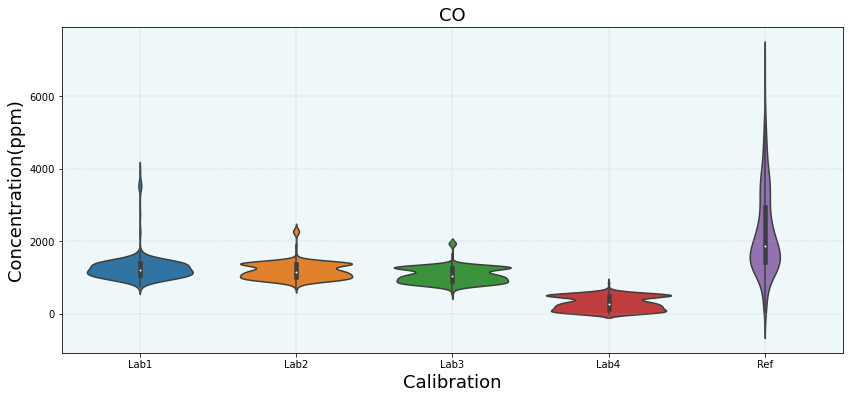

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
co_data=CO_data
co_data=co_data[(co_data[co_data.columns] >= 0).all(axis=1)]
#CO_data=CO_data.resample('D').mean()
co_data=co_data.dropna() 
co_data.shape

L1=co_data['Lab1'].to_list()
L2=co_data['Lab2'].to_list()
L3=co_data['Lab3'].to_list()
L4=co_data['Lab4'].to_list()
Ref=co_data['Ref'].to_list()
Conc=L1+L2+L3+L4+Ref
model1=['Lab1' for i in range(len(L1))]
model2=['Lab2' for i in range(len(L1))]
model3=['Lab3' for i in range(len(L1))]
model4=['Lab4' for i in range(len(L1))]
Ref=['Ref' for i in range(len(L1))]
model=model1+model2+model3+model4+Ref

data=[[model[i],Conc[i]] for i in range(len(model))]
data=pd.DataFrame(data=data,columns=['model','Concentration(ppm)'])
fig= plt.figure(figsize=(14,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.2)
sns.violinplot(x="model", y="Concentration(ppm)", data=data)
plt.grid(linestyle='-.',linewidth=0.3)
plt.xlabel('Calibration', fontsize=18)
plt.ylabel('Concentration(ppm)',fontsize=18)
plt.title('CO',fontsize=18)

10.001758318900059


Text(0.5, 1.0, 'NO2')

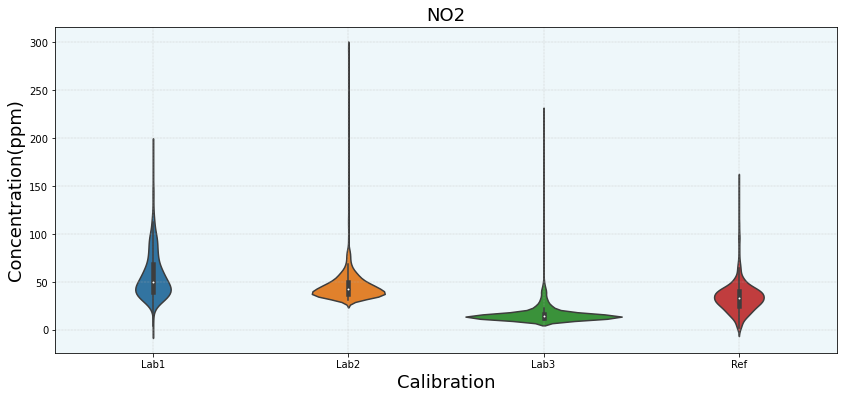

In [74]:
no2_data=NO2_data
no2_data=no2_data.drop(['Lab4'],axis=1)
no2_data=no2_data[(no2_data[no2_data.columns] >= 0).all(axis=1)]
#CO_data=CO_data.resample('D').mean()
no2_data=no2_data.dropna() 
L1=no2_data['Lab1'].to_list()
for i in range(len(L1)):
    if L1[i]>400:
        L1[i]=np.mean(np.array(L1))
    
L2=no2_data['Lab2'].to_list()
L3=no2_data['Lab3'].to_list()
for i in range(len(L1)):
    if L3[i]<10:
        L3[i]=np.mean(np.array(L3))
#L4=no2_data['Lab4'].to_list()
Ref=no2_data['Ref'].to_list()
Conc=L1+L2+L3+Ref
model1=['Lab1' for i in range(len(L1))]
model2=['Lab2' for i in range(len(L1))]
model3=['Lab3' for i in range(len(L1))]
#model4=['Lab4' for i in range(len(L1))]
print(min(L3))
Ref=['Ref' for i in range(len(L1))]
model=model1+model2+model3+Ref

data=[[model[i],Conc[i]] for i in range(len(model))]
data=pd.DataFrame(data=data,columns=['model','Concentration(ppm)'])
fig= plt.figure(figsize=(14,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.2)
sns.violinplot(x="model", y="Concentration(ppm)", data=data)
plt.grid(linestyle='-.',linewidth=0.3)
plt.xlabel('Calibration', fontsize=18)
plt.ylabel('Concentration(ppm)',fontsize=18)
plt.title('NO2',fontsize=18)

# Model Architecture

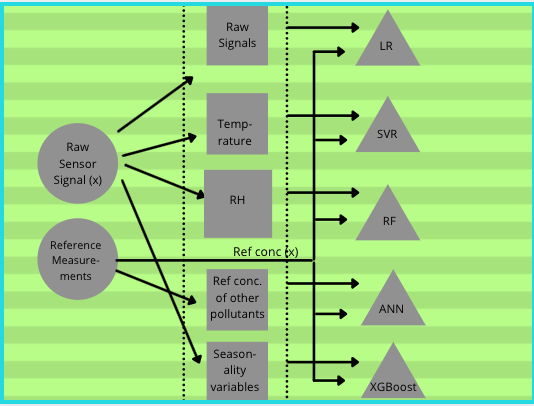

<Figure size 720x432 with 0 Axes>

In [75]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(10,6))
from IPython.display import Image
Image('Architecture.png')

# CO CALIBRATION

In [76]:
CO_data['Month']=CO_data.index.month
CO_data['Day_of_week']=CO_data.index.dayofweek
CO_data['Day']=CO_data.index.day
CO_data['Hour']=CO_data.index.hour
CO_data['Ref_NO2']=NO2_data['Ref'].to_list()
CO_data['Ref_SO2']=SO2_data['Ref'].to_list()
CO_data['Ref_O3']=O3_data['Ref'].to_list()
CO_Data=CO_data[['Signal','Ref_NO2','Ref_SO2','Ref_O3','Lab1','Temp','RH','Ref','Month','Day_of_week','Day','Hour']]
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
#CO_data=CO_data.resample('D').mean()
CO_Data=CO_Data.dropna() 
CO_Data.shape


(5895, 12)

## Model 1: Linear Regression

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
CO_Data=CO_Data.values
print(CO_Data.shape)

(5895, 12)


# Outlier detection
## Isolation Forest

In [79]:
from sklearn.ensemble import IsolationForest
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(CO_Data)
# select all rows that are not outliers
mask = yhat != -1
CO_Data= CO_Data[mask, :]
print(CO_Data.shape)
X,y = CO_Data[:, :-1], CO_Data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape, y_train.shape)
len(y_test)

(4774, 12)
(3819, 11) (3819,)


955

In [80]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)
pred = model.predict(X_test)
#lab1=X['Lab1'].to_list()[len(y_train):]

index=[i for i in range(len(y_test))]
Y_test=y_test
Y_test=pd.Series(Y_test,index =index)
Y_test
Pred=pd.Series(pred,index =index)
#Lab1=pd.Series(lab1,index =index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
#sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
#RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
#Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_lr_CO=sMAPE_lr
RMSE_lr_CO=round(RMSE_lr/np.mean(np.array(y_test)),2)
Pearson_lr_CO=Pearson_lr
#sMAPE_lab_CO=sMAPE_lab
#RMSE_lab_CO=round(RMSE_lab/np.mean(np.array(lab1)),2)
#Pearson_lab_CO=Pearson_lab
R2_lr_CO=round(sm.r2_score(y_test, pred), 2)
#R2_lab_CO=round(sm.r2_score(y_test, lab1), 2)
RMSE_Lr_CO=RMSE_lr
#RMSE_Lab_CO=RMSE_lab

A=len(y_test)-200
D=max(y_test[A:])-0.2*max(y_test[A:])
C=max(y_test[A:])-0.1*max(y_test[A:])
B=A+120

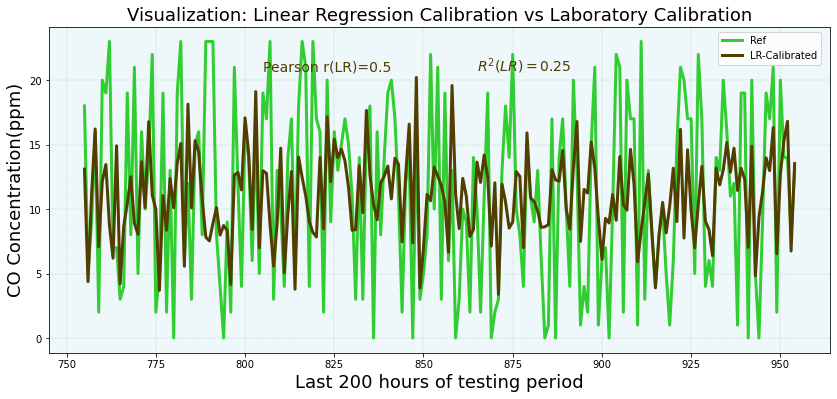

In [81]:
fig= plt.figure(figsize=(14,6))
index=[i for i in range(len(y_test))]
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.2)
plt.plot(index[A:],y_test[A:], color='limegreen',linewidth=3)
plt.plot(index[A:],pred[A:], color='#513e00',linewidth=3)
#plt.plot(index[A:],lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'LR-Calibrated', 'Lab-Calibrated'], loc = 2, bbox_to_anchor = (0.85,1))
plt.ylabel('CO Concentration(ppm)',fontsize=18)
plt.text(B-10, C, r'$R^{2}(LR)=$'+str(R2_lr_CO), fontsize = 14, color='#513e00')
#plt.text(B-10, D, r'$R^{2}(Lab)=$' +str(R2_lab_CO), fontsize = 14, color='#426eff')
plt.text(B-70, C, 'Pearson r(LR)='+str(Pearson_lr), fontsize = 14, color='#513e00')
#plt.text(B-70, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
plt.xlabel('Last 200 hours of testing period',fontsize=18)
plt.title('Visualization: Linear Regression Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [18]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))
pred_lr=pred
MBE_LR_CO=MBE(pred,y_test)/np.std(y_test)
CRMSE_LR_CO=CRMSE(y_test,pred)/np.std(y_test)
MBE_LAB_CO=MBE(lab1,y_test)/np.std(y_test)
CRMSE_LAB_CO=CRMSE(y_test,lab1)/np.std(y_test)

Regressor model performance:
Mean absolute error(MAE) = 202.98
Mean squared error(MSE) = 126894.04
Median absolute error = 127.51
Explain variance score = 0.76
R2 score = 0.76


## Model 2 :  Support Vector Regression (SVR)

In [19]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
regressor = SVR(kernel = 'linear')
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)
for i in range(len(Pred)):
    if pred[i]<0:
        pred[i]=np.mean(np.array(pred))
pred_svr=pred

In [20]:
lab1=CO_Data['Lab1'].to_list()[len(y_train):]
index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =index)
Y_test
Pred=pd.Series(pred,index =index)

Lab1=pd.Series(lab1,index =index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_svr_CO=sMAPE_lr
RMSE_svr_CO=round(RMSE_lr/np.mean(np.array(y_test)),2)
Pearson_svr_CO=Pearson_lr
R2_svr_CO=round(sm.r2_score(y_test, pred), 2)
RMSE_Svr_CO=RMSE_lr

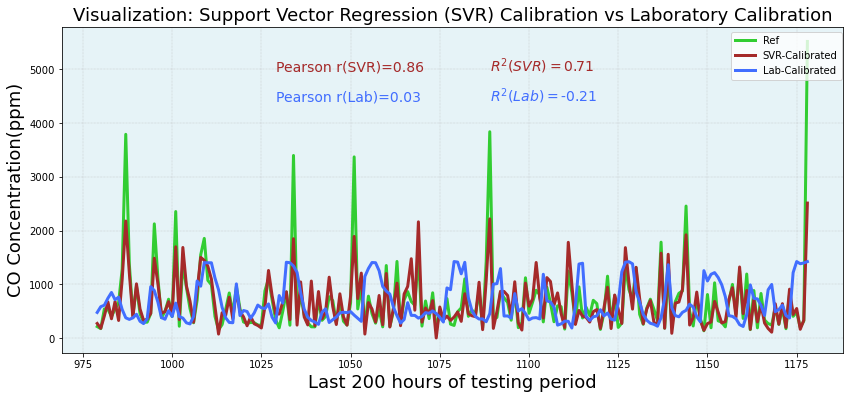

In [21]:
A=len(y_test)-200
D=max(y_test[A:])-0.2*max(y_test[A:])
C=max(y_test[A:])-0.1*max(y_test[A:])
B=A+120

fig= plt.figure(figsize=(14,6))
index=[i for i in range(len(y_test))]
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index[A:],y_test[A:], color='limegreen',linewidth=3)
plt.plot(index[A:],pred[A:], color='brown',linewidth=3)
plt.plot(index[A:],lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'SVR-Calibrated', 'Lab-Calibrated'], loc = 2, bbox_to_anchor = (0.85,1))
plt.ylabel('CO Concentration(ppm)',fontsize=18)
plt.text(B-10, C,r'$R^{2}(SVR)=$'+str(R2_svr_CO) , fontsize = 14, color='brown')
plt.text(B-10, D,r'$R^{2}(Lab)=$'+str(R2_lab_CO) , fontsize = 14, color='#426eff')
plt.text(B-70, C, 'Pearson r(SVR)='+str(Pearson_lr), fontsize = 14, color='brown')
plt.text(B-70, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
plt.xlabel('Last 200 hours of testing period',fontsize=18)
plt.title('Visualization: Support Vector Regression (SVR) Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [22]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))
pred_svr=pred
MBE_SVR_CO=MBE(pred,y_test)/np.std(y_test)
CRMSE_SVR_CO=CRMSE(y_test,pred)/np.std(y_test)

Regressor model performance:
Mean absolute error(MAE) = 182.94
Mean squared error(MSE) = 149191.51
Median absolute error = 97.23
Explain variance score = 0.71
R2 score = 0.71


## Model 3 : Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 500, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train)  

RandomForestRegressor(n_estimators=500, random_state=0)

In [24]:
features_CO=regressor.feature_importances_
pred = regressor.predict(X_test)
lab1=CO_Data['Lab1'].to_list()[len(y_train):]
index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =index)
Y_test
Pred=pd.Series(pred,index =index)
Lab1=pd.Series(lab1,index =index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_rf_CO=sMAPE_lr
RMSE_rf_CO=round(RMSE_lr/np.mean(np.array(y_test)),2)
Pearson_rf_CO=Pearson_lr
R2_rf_CO=round(sm.r2_score(y_test, pred), 2)
RMSE_Rf_CO=RMSE_lr

A=len(y_test)-200
D=max(y_test[A:])-0.2*max(y_test[A:])
C=max(y_test[A:])-0.1*max(y_test[A:])
B=A+120

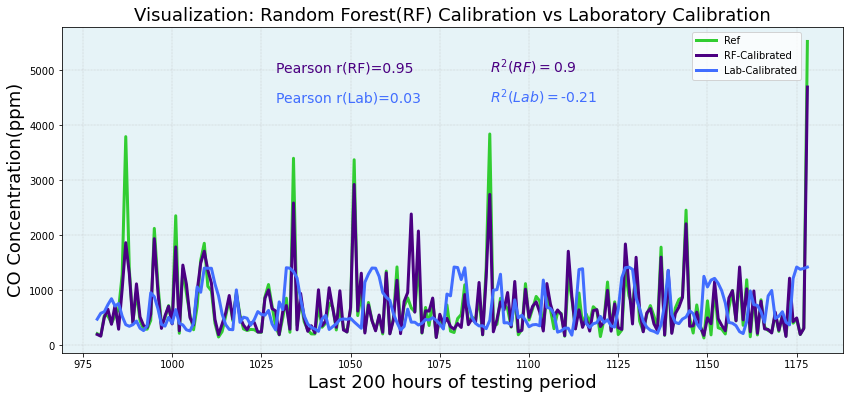

In [25]:
fig= plt.figure(figsize=(14,6))
index=[i for i in range(len(y_test))]
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index[A:],y_test[A:], color='limegreen',linewidth=3)
plt.plot(index[A:],pred[A:], color='indigo',linewidth=3)
plt.plot(index[A:],lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'RF-Calibrated', 'Lab-Calibrated'], loc = 2, bbox_to_anchor = (0.8,1))
plt.ylabel('CO Concentration(ppm)',fontsize=18)
plt.text(B-10, C, r'$R^{2}(RF)=$'+str(R2_rf_CO), fontsize = 14, color='indigo')
plt.text(B-10, D, r'$R^{2}(Lab)=$'+str(R2_lab_CO), fontsize = 14, color='#426eff')
plt.text(B-70, C, 'Pearson r(RF)='+str(Pearson_lr), fontsize = 14, color='indigo')
plt.text(B-70, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
plt.xlabel('Last 200 hours of testing period',fontsize=18)
plt.title('Visualization: Random Forest(RF) Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [26]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))
pred_rf=pred
MBE_RF_CO=MBE(pred,y_test)/np.std(y_test)
CRMSE_RF_CO=CRMSE(y_test,pred)/np.std(y_test)

Regressor model performance:
Mean absolute error(MAE) = 109.26
Mean squared error(MSE) = 49732.41
Median absolute error = 53.04
Explain variance score = 0.9
R2 score = 0.9


## Model 5: ANN

In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.preprocessing import StandardScaler
model = Sequential()
model.add(Dense(3, input_shape = (10,),kernel_initializer='normal', activation= 'linear'))
model.add(Dense(128,kernel_initializer='normal', activation= 'relu'))
model.add(Dense(128, kernel_initializer='normal',activation= 'relu'))
model.add(Dense(100, kernel_initializer='normal',activation= 'relu'))
model.add(Dense(1,kernel_initializer='normal',activation='linear',))
sgd = optimizers.Adam(learning_rate=0.01)

model.compile(optimizer = sgd, loss = 'mean_squared_error', metrics= ['mse', 'mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 33        
_________________________________________________________________
dense_1 (Dense)              (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               12900     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 30,058
Trainable params: 30,058
Non-trainable params: 0
_________________________________________________________________


In [28]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
hist=model.fit(X_train_scaled, y_train, batch_size= 10, epochs=200, verbose= 0)#,validation_split=0.2

In [29]:
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)
pred=[]
for i in range(len(test_pred)):
    pred.append(sum(list(test_pred[i])))
    
lab1=CO_Data['Lab1'].to_list()[len(y_train):]
index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =index)
Y_test
Pred=pd.Series(pred,index =index)
Lab1=pd.Series(lab1,index =index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_ann_CO=sMAPE_lr
RMSE_ann_CO=round(RMSE_lr/np.mean(np.array(y_test)),2)
Pearson_ann_CO=Pearson_lr
R2_ann_CO=round(sm.r2_score(y_test, pred), 2)
RMSE_Ann_CO=RMSE_lr

A=len(y_test)-200
D=max(y_test[A:])-0.2*max(y_test[A:])
C=max(y_test[A:])-0.1*max(y_test[A:])
B=A+120



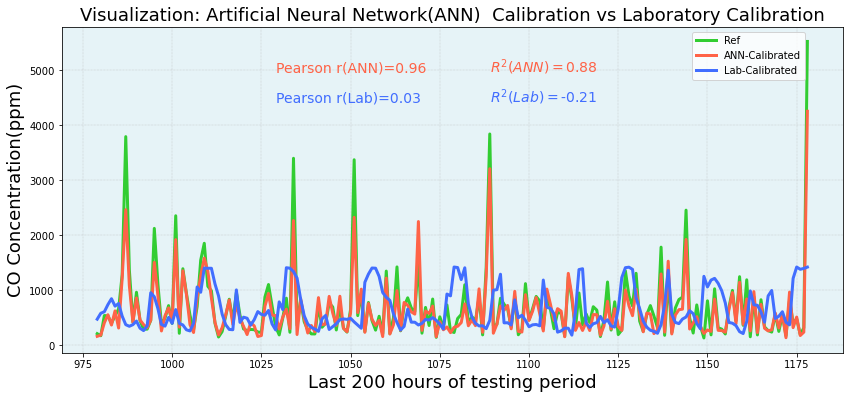

In [30]:
fig= plt.figure(figsize=(14,6))
index=[i for i in range(len(y_test))]
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index[A:],y_test[A:], color='limegreen',linewidth=3)
plt.plot(index[A:],pred[A:], color='tomato',linewidth=3)
plt.plot(index[A:],lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'ANN-Calibrated', 'Lab-Calibrated'], loc = 2, bbox_to_anchor = (0.8,1))
plt.ylabel('CO Concentration(ppm)',fontsize=18)
plt.text(B-10, C, r'$R^{2}(ANN)=$'+str(R2_ann_CO), fontsize = 14, color='tomato')
plt.text(B-10, D, r'$R^{2}(Lab)=$'+str(R2_lab_CO), fontsize = 14, color='#426eff')
plt.text(B-70, C, 'Pearson r(ANN)='+str(Pearson_lr), fontsize = 14, color='tomato')
plt.text(B-70, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
plt.xlabel('Last 200 hours of testing period',fontsize=18)
plt.title('Visualization: Artificial Neural Network(ANN)  Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [31]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))
pred_ann=pred
MBE_ANN_CO=MBE(pred,y_test)/np.std(y_test)
CRMSE_ANN_CO=CRMSE(y_test,pred)/np.std(y_test)

Regressor model performance:
Mean absolute error(MAE) = 125.02
Mean squared error(MSE) = 62434.08
Median absolute error = 66.41
Explain variance score = 0.89
R2 score = 0.88


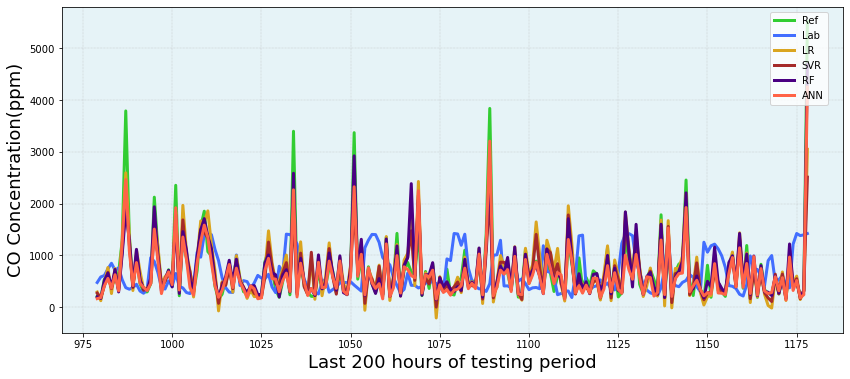

In [32]:
A=len(y_test)-200

fig= plt.figure(figsize=(14,6))
index=[i for i in range(len(y_test))]
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index[A:],y_test[A:], color='limegreen',linewidth=3)
plt.plot(index[A:],lab1[A:], color='#426eff',linewidth=3)
plt.plot(index[A:],pred_lr[A:], color='goldenrod',linewidth=3)
plt.plot(index[A:],pred_svr[A:], color='brown',linewidth=3)
plt.plot(index[A:],pred_rf[A:], color='indigo',linewidth=3)
plt.plot(index[A:],pred_ann[A:], color='tomato',linewidth=3)

plt.xlabel('Last 200 hours of testing period',fontsize=18)
plt.ylabel('CO Concentration(ppm)',fontsize=18)
plt.legend(['Ref', 'Lab', 'LR','SVR','RF','ANN'], loc = 2, bbox_to_anchor = (0.9,1))
#plt.title('CO Sensor',fontsize=18 )
plt.grid(linestyle='-.',linewidth=0.3)

# Model 6: XGBoost

In [33]:
from xgboost import  XGBRegressor
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# create an xgboost regression model
#n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9,colsample_bytree=0.4,alpha=10
model = XGBRegressor(n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9, 
                     colsample_bytree=0.4,alpha=10)
model.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, eta=0.01, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
pred = model.predict(X_test)
index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =index)
Y_test
Pred=pd.Series(pred,index =index)
Lab1=pd.Series(lab1,index =index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_xgb_CO=sMAPE_lr
RMSE_xgb_CO=RMSE_lr/np.mean(np.array(y_test))
Pearson_xgb_CO=Pearson_lr
R2_xgb_CO=round(sm.r2_score(y_test, pred), 2)
RMSE_Xgb_CO=RMSE_lr

A=len(y_test)-200
D=max(y_test[A:])-0.2*max(y_test[A:])
C=max(y_test[A:])-0.1*max(y_test[A:])
B=A+120



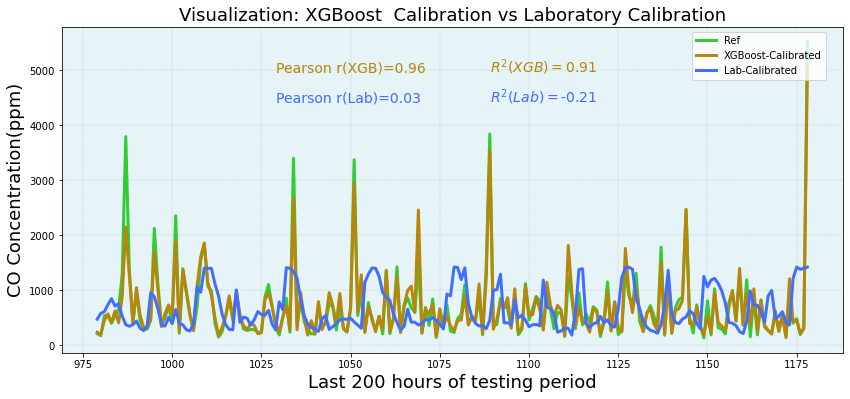

In [35]:
fig= plt.figure(figsize=(14,6))
index=[i for i in range(len(y_test))]
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index[A:],y_test[A:], color='limegreen',linewidth=3)
plt.plot(index[A:],pred[A:], color='darkgoldenrod',linewidth=3)
plt.plot(index[A:],lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'XGBoost-Calibrated', 'Lab-Calibrated'], loc = 2, bbox_to_anchor = (0.8,1))
plt.ylabel('CO Concentration(ppm)',fontsize=18)
plt.text(B-10, C,r'$R^{2}(XGB)=$'+str(R2_xgb_CO) , fontsize = 14, color='darkgoldenrod')
plt.text(B-10, D,r'$R^{2}(Lab)=$'+str(R2_lab_CO), fontsize = 14, color='#426eff')
plt.text(B-70, C, 'Pearson r(XGB)='+str(Pearson_lr), fontsize = 14, color='darkgoldenrod')
plt.text(B-70, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
plt.xlabel('Last 200 hours of testing period',fontsize=18)
plt.title('Visualization: XGBoost  Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [36]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))
pred_xgb=pred
MBE_XGB_CO=MBE(pred,y_test)/np.std(y_test)
CRMSE_XGB_CO=CRMSE(y_test,pred)/np.std(y_test)

Regressor model performance:
Mean absolute error(MAE) = 98.18
Mean squared error(MSE) = 47072.59
Median absolute error = 47.75
Explain variance score = 0.91
R2 score = 0.91


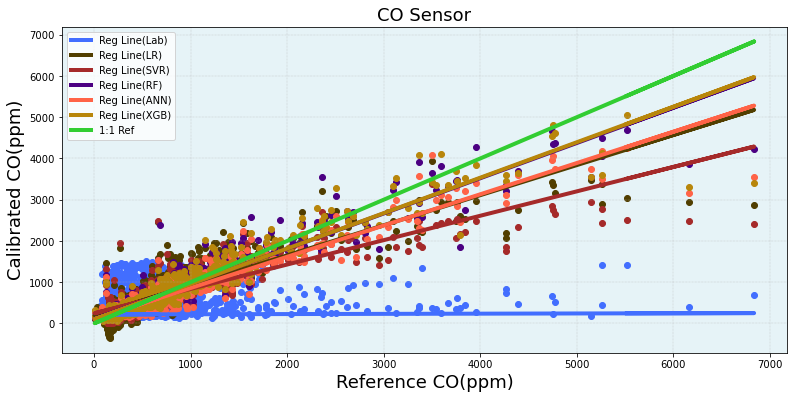

In [37]:
fig= plt.figure(figsize=(13,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
m0, b0 = np.polyfit(np.array(y_test), 0.4*np.array(lab1), 1)
plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
plt.scatter(np.array(y_test),np.array(lab1),color='#426eff')
plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00')
plt.scatter(np.array(y_test),np.array(pred_svr),color='brown')
plt.scatter(np.array(y_test),np.array(pred_rf),color='indigo')
plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato')
plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod')
ax.plot(y_test,y_test, c ="limegreen",linewidth=4)
plt.xlabel('Reference CO(ppm)',fontsize=18)
plt.ylabel('Calibrated CO(ppm)',fontsize=18)
plt.legend(['Reg Line(Lab)','Reg Line(LR)','Reg Line(SVR)','Reg Line(RF)','Reg Line(ANN)','Reg Line(XGB)'
            ,'1:1 Ref'], loc = 2, bbox_to_anchor = (0,1))
plt.title('CO Sensor',fontsize=18 )
plt.grid(linestyle='-.',linewidth=0.3)

# NO2 Calibration

In [38]:
import pandas as pd
import scipy.io
import numpy as np
mat = scipy.io.loadmat('NO2final.mat')
#cardio_df = pd.DataFrame(mat)

len(mat['NO2final'])
L_NO2final=[]
for i in range(len(mat['NO2final'])):
    L_NO2final.append(list(mat['NO2final'][i]))

NO2_data=pd.DataFrame(L_NO2final,columns=['Lab1', 'Lab2','Lab3','Lab4','Temp','RH','Ref','Time'])
Time=NO2_data['Time'].to_list()
Time=np.array(Time)
Date=pd.to_datetime(Time-719529,unit='d').round('h')
NO2_data['Date'] = Date.tolist()
NO2_data=NO2_data.set_index('Date')
NO2_data.drop('Time',axis = 1, inplace = True)

mat = scipy.io.loadmat('NO2_raw.mat')

L_NO2_raw=[]
for i in range(len(mat['NO2_raw'])):
    L_NO2_raw.append(list(mat['NO2_raw'][i]))

NO2_raw=pd.DataFrame(L_NO2_raw,columns=['WE', 'AE','Temp','RH','Time'])
NO2_raw.head()
NO2_data.insert(loc = 0,
          column = 'WE',
          value = NO2_raw['WE'].to_list())

NO2_data.insert(loc = 1,
          column = 'AE',
          value = NO2_raw['AE'].to_list())


NO2_data=NO2_data.interpolate()
WE=np.array(NO2_data['WE'].to_list())
AE=np.array(NO2_data['AE'].to_list())
Signal=list(WE-AE)
NO2_data.insert(loc = 2,
          column = 'Signal',
          value = Signal)
NO2_data.head()


WE          AE     Signal         Lab1  \
Date                                                                  
2019-10-02 12:00:00  157.696563  149.846563   7.850000   460.448301   
2019-10-02 13:00:00    0.586429   39.937143 -39.350714  1186.045510   
2019-10-02 16:00:00   17.601343   40.504328 -22.902985  1293.158435   
2019-10-02 17:00:00  190.049701  180.774030   9.275672   219.575228   
2019-10-03 16:00:00  226.502857  202.540000  23.962857    86.725922   

                          Lab2        Lab3         Lab4       Temp         RH  \
Date                                                                            
2019-10-02 12:00:00  11.259601  -54.281210  -844.685734  26.378438  58.063437   
2019-10-02 13:00:00 -64.843326 -173.647930 -1383.373409  25.502791  59.868837   
2019-10-02 16:00:00  11.194037 -180.488333 -1212.985070  30.827910  49.008060   
2019-10-02 17:00:00  -6.131452  -65.833055  -658.643041  30.047164  51.259851   
2019-10-03 16:00:00  23.809224  -16.484097  -552.026071  29.441429  52.018571   

                           Ref  
Date                            
2019-10-02 12:00:00   9.613288  
2019-10-02 13:00:00  15.181394  
2019-10-02 16:00:00  13.091546  
2019-10-02 17:00:00  18.506848  
2019-10-03 16:00:00  14.396420

In [39]:
NO2_data.shape

(6021, 10)

In [40]:
NO2_data.describe()

WE           AE       Signal         Lab1         Lab2  \
count  6021.000000  6021.000000  6021.000000  6021.000000  6021.000000   
mean    229.111036   208.110467    21.000569    25.722637     7.072620   
std      12.722230     6.938218     8.591080    55.107618    29.587763   
min       0.564000    38.872000   -41.667777  -280.068781  -164.140427   
25%     220.486982   205.346944    15.064583     7.989353   -12.228035   
50%     233.389663   209.662979    23.171917    21.358645    14.460956   
75%     236.966050   211.015514    26.593889    38.074513    26.521991   
max     255.366500   227.651463    93.160938  1461.434904   293.708249   

              Lab3         Lab4         Temp           RH          Ref  
count  6021.000000  6021.000000  6021.000000  6021.000000  6021.000000  
mean    -28.377323  -697.352025    18.257658    67.307475    24.310285  
std      31.418703   111.688152     7.601533    18.453782    18.579753  
min    -235.559257 -1393.920200     1.037101    11.428168     1.050620  
25%     -49.497866  -769.552964    12.409531    53.636250    11.589200  
50%     -19.292374  -722.425997    16.868500    72.245143    19.618169  
75%      -7.293931  -655.081265    22.844245    82.935250    31.467247  
max     226.584223  -165.049809    44.748056    93.012486   154.545243

In [41]:
NO2_data['Month']=NO2_data.index.month
NO2_data['Day_of_week']=NO2_data.index.dayofweek
NO2_data['Day']=NO2_data.index.day
NO2_data['Hour']=NO2_data.index.hour
NO2_data['Ref_CO']=CO_data['Ref'].to_list()
NO2_data['Ref_SO2']=SO2_data['Ref'].to_list()
NO2_data['Ref_O3']=O3_data['Ref'].to_list()
NO2_Data=NO2_data[['Signal','Ref_CO','Ref_SO2','Ref_O3','Lab1','Temp','RH','Ref','Month','Day_of_week','Day','Hour']]
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
#CO_data=CO_data.resample('D').mean()
NO2_Data=NO2_Data.dropna() 
NO2_Data.shape

(4691, 12)

## Model 1: Linear Regression (LR)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
X=NO2_Data[['Signal','Ref_CO','Ref_SO2','Ref_O3','Temp','RH','Month','Day_of_week','Day','Hour']]
y=NO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X_test)


939

In [43]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)
pred = model.predict(X_test)
lab1=NO2_Data['Lab1'].to_list()[len(y_train):]
index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =index)
Y_test
Pred=pd.Series(pred,index =index)
Lab1=pd.Series(lab1,index =index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_lr_NO2=sMAPE_lr
RMSE_lr_NO2=round(RMSE_lr/np.mean(np.array(y_test)),2)
Pearson_lr_NO2=Pearson_lr
sMAPE_lab_NO2=sMAPE_lab
RMSE_lab_NO2=round(RMSE_lab/np.mean(np.array(lab1)),2)
Pearson_lab_NO2=Pearson_lab
R2_lr_NO2=round(sm.r2_score(y_test, pred), 2)
R2_lab_NO2=round(sm.r2_score(y_test, lab1), 2)
RMSE_Lr_NO2=RMSE_lr
RMSE_Lab_NO2=RMSE_lab

A=len(y_test)-200
B=A+120
D=max(y_test[A:])-0.1*max(y_test[A:])
C=max(y_test[A:])-0*max(y_test[A:])




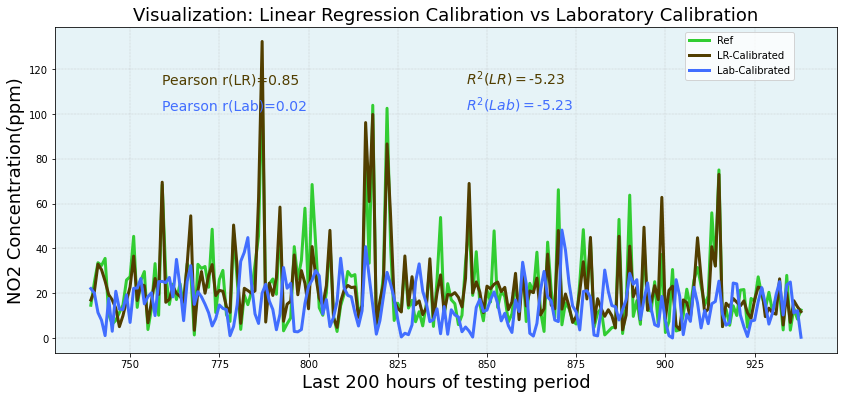

In [44]:
fig= plt.figure(figsize=(14,6))
index=[i for i in range(len(y_test))]
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index[A:],y_test[A:], color='limegreen',linewidth=3)
plt.plot(index[A:],pred[A:], color='#513e00',linewidth=3)
plt.plot(index[A:],lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'LR-Calibrated', 'Lab-Calibrated'], loc = 2, bbox_to_anchor = (0.8,1))
plt.ylabel('NO2 Concentration(ppm)',fontsize=18)
plt.text(B-15, C,r'$R^{2}(LR)=$'+str(R2_lab_NO2) , fontsize = 14, color='#513e00')
plt.text(B-15, D,r'$R^{2}(Lab)=$'+str(R2_lab_NO2) , fontsize = 14, color='#426eff')
plt.text(B-100, C, 'Pearson r(LR)='+str(Pearson_lr), fontsize = 14, color='#513e00')
plt.text(B-100, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
plt.xlabel('Last 200 hours of testing period',fontsize=18)
plt.title('Visualization: Linear Regression Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [45]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_LR_NO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_LR_NO2=CRMSE(y_test,pred)/np.std(y_test)
MBE_LAB_NO2=MBE(lab1,y_test)/(2.6*np.std(y_test))
CRMSE_LAB_NO2=CRMSE(y_test,lab1)/(2.6*np.std(y_test))
pred_lr=pred

Regressor model performance:
Mean absolute error(MAE) = 6.42
Mean squared error(MSE) = 83.6
Median absolute error = 4.71
Explain variance score = 0.73
R2 score = 0.73


## Model 2: Support Vector Regression (SVR)

In [46]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
regressor = SVR(kernel = 'poly')
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)
for i in range(len(Pred)):
    if pred[i]<0:
        pred[i]=np.mean(np.array(pred))

In [47]:
lab1=NO2_Data['Lab1'].to_list()[len(y_train):]
index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =index)
Y_test
Pred=pd.Series(pred,index =index)
Lab1=pd.Series(lab1,index =index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_svr_NO2=sMAPE_lr
RMSE_svr_NO2=round(RMSE_lr/np.mean(np.array(y_test)),2)
Pearson_svr_NO2=Pearson_lr
R2_svr_NO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Svr_NO2=RMSE_lr

A=len(y_test)-200
D=max(y_test[A:])-0.1*max(y_test[A:])
C=max(y_test[A:])-0*max(y_test[A:])
B=A+120



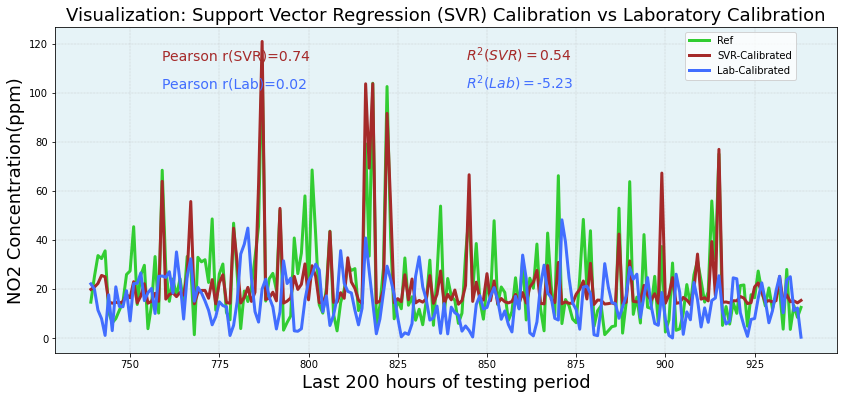

In [48]:
fig= plt.figure(figsize=(14,6))
index=[i for i in range(len(y_test))]
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index[A:],y_test[A:], color='limegreen',linewidth=3)
plt.plot(index[A:],pred[A:], color='brown',linewidth=3)
plt.plot(index[A:],lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'SVR-Calibrated', 'Lab-Calibrated'], loc = 2, bbox_to_anchor = (0.8,1))
plt.ylabel('NO2 Concentration(ppm)',fontsize=18)
plt.text(B-15, C, r'$R^{2}(SVR)=$'+str(R2_svr_NO2), fontsize = 14, color='brown')
plt.text(B-15, D, r'$R^{2}(Lab)=$'+str(R2_lab_NO2), fontsize = 14, color='#426eff')
plt.text(B-100, C, 'Pearson r(SVR)='+str(Pearson_lr), fontsize = 14, color='brown')
plt.text(B-100, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
plt.xlabel('Last 200 hours of testing period',fontsize=18)
plt.title('Visualization: Support Vector Regression (SVR) Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [49]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_SVR_NO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_SVR_NO2=CRMSE(y_test,pred)/np.std(y_test)
pred_svr=pred

Regressor model performance:
Mean absolute error(MAE) = 8.34
Mean squared error(MSE) = 141.73
Median absolute error = 6.37
Explain variance score = 0.54
R2 score = 0.54


## Model 3: Random Forest

In [50]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 500, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train)  

RandomForestRegressor(n_estimators=500, random_state=0)

In [51]:
features_NO2=regressor.feature_importances_
pred = regressor.predict(X_test)
lab1=NO2_Data['Lab1'].to_list()[len(y_train):]
index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =index)
Y_test
Pred=pd.Series(pred,index =index)
Lab1=pd.Series(lab1,index =index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_rf_NO2=sMAPE_lr
RMSE_rf_NO2=round(RMSE_lr/np.mean(np.array(y_test)),2)
Pearson_rf_NO2=Pearson_lr
R2_rf_NO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Rf_NO2=RMSE_lr

A=len(y_test)-200
D=max(y_test[A:])-0.1*max(y_test[A:])
C=max(y_test[A:])-0*max(y_test[A:])
B=A+120



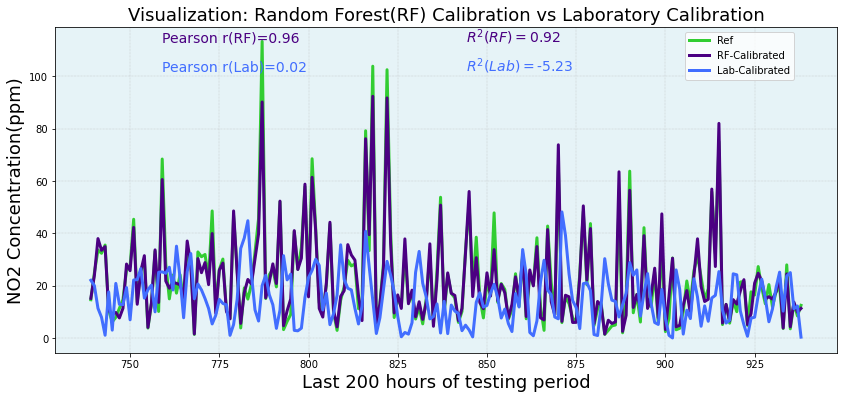

In [52]:
fig= plt.figure(figsize=(14,6))
index=[i for i in range(len(y_test))]
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index[A:],y_test[A:], color='limegreen',linewidth=3)
plt.plot(index[A:],pred[A:], color='indigo',linewidth=3)
plt.plot(index[A:],lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'RF-Calibrated', 'Lab-Calibrated'], loc = 2, bbox_to_anchor = (0.8,1))
plt.ylabel('NO2 Concentration(ppm)',fontsize=18)
plt.text(B-15, C,r'$R^{2}(RF)=$'+str(R2_rf_NO2) , fontsize = 14, color='indigo')
plt.text(B-15, D,r'$R^{2}(Lab)=$'+str(R2_lab_NO2) , fontsize = 14, color='#426eff')
plt.text(B-100, C, 'Pearson r(RF)='+str(Pearson_lr), fontsize = 14, color='indigo')
plt.text(B-100, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
plt.xlabel('Last 200 hours of testing period',fontsize=18)
plt.title('Visualization: Random Forest(RF) Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [53]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_RF_NO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_RF_NO2=CRMSE(y_test,pred)/np.std(y_test)
pred_rf=pred

Regressor model performance:
Mean absolute error(MAE) = 3.09
Mean squared error(MSE) = 25.07
Median absolute error = 1.92
Explain variance score = 0.92
R2 score = 0.92


## Model 4 : ANN

In [54]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.preprocessing import StandardScaler
model = Sequential()
model.add(Dense(6, input_shape = (10,),kernel_initializer='normal', activation= 'linear'))
model.add(Dense(128,kernel_initializer='normal', activation= 'relu'))
model.add(Dense(128, kernel_initializer='normal',activation= 'relu'))
model.add(Dense(100, kernel_initializer='normal',activation= 'relu'))
model.add(Dense(1,kernel_initializer='normal',activation='linear',))
sgd = optimizers.Adam(learning_rate=0.01)

model.compile(optimizer = sgd, loss = 'mean_squared_error', metrics= ['mse', 'mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 6)                 66        
_________________________________________________________________
dense_6 (Dense)              (None, 128)               896       
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 100)               12900     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 30,475
Trainable params: 30,475
Non-trainable params: 0
_________________________________________________________________


In [55]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
model.fit(X_train_scaled, y_train, batch_size= 100, epochs=200, verbose= 0)

In [56]:
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)
pred=[]
for i in range(len(test_pred)):
    pred.append(sum(list(test_pred[i])))
len(y_test)

939

In [57]:
lab1=NO2_Data['Lab1'].to_list()[len(y_train):]
index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =index)
Y_test
Pred=pd.Series(pred,index =index)
Lab1=pd.Series(lab1,index =index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_ann_NO2=sMAPE_lr
RMSE_ann_NO2=round(RMSE_lr/np.mean(np.array(y_test)),2)
Pearson_ann_NO2=Pearson_lr
R2_ann_NO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Ann_NO2=RMSE_lr

A=len(y_test)-200
D=max(y_test[A:])-0.1*max(y_test[A:])
C=max(y_test[A:])-0*max(y_test[A:])
B=A+120



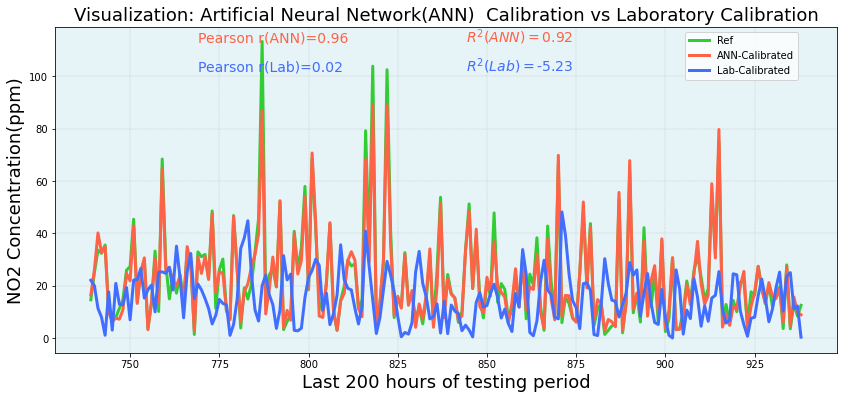

In [58]:
fig= plt.figure(figsize=(14,6))
index=[i for i in range(len(y_test))]
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index[A:],y_test[A:], color='limegreen',linewidth=3)
plt.plot(index[A:],pred[A:], color='tomato',linewidth=3)
plt.plot(index[A:],lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'ANN-Calibrated', 'Lab-Calibrated'], loc = 2, bbox_to_anchor = (0.8,1))
plt.ylabel('NO2 Concentration(ppm)',fontsize=18)
plt.text(B-15, C, r'$R^{2}(ANN)=$'+str(R2_ann_NO2), fontsize = 14, color='tomato')
plt.text(B-15, D, r'$R^{2}(Lab)=$'+str(R2_lab_NO2), fontsize = 14, color='#426eff')
plt.text(B-90, C, 'Pearson r(ANN)='+str(Pearson_lr), fontsize = 14, color='tomato')
plt.text(B-90, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
plt.xlabel('Last 200 hours of testing period',fontsize=18)
plt.title('Visualization: Artificial Neural Network(ANN)  Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [59]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_ANN_NO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_ANN_NO2=CRMSE(y_test,pred)/(np.std(y_test))
pred_ann=pred

Regressor model performance:
Mean absolute error(MAE) = 3.0
Mean squared error(MSE) = 23.56
Median absolute error = 2.12
Explain variance score = 0.92
R2 score = 0.92


# Model 5: XGBoost

In [60]:
from xgboost import  XGBRegressor
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# create an xgboost regression model
#n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9,colsample_bytree=0.4,alpha=10
model = XGBRegressor(n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9, 
                     colsample_bytree=0.4,alpha=10)

model.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, eta=0.01, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [61]:
pred = model.predict(X_test)
index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =index)
Y_test
Pred=pd.Series(pred,index =index)
Lab1=pd.Series(lab1,index =index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_xgb_NO2=sMAPE_lr
RMSE_xgb_NO2=RMSE_lr/np.mean(np.array(y_test))
Pearson_xgb_NO2=Pearson_lr
R2_xgb_NO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Xgb_NO2=RMSE_lr


A=len(y_test)-200
D=max(y_test[A:])-0.1*max(y_test[A:])
C=max(y_test[A:])-0*max(y_test[A:])
B=A+120



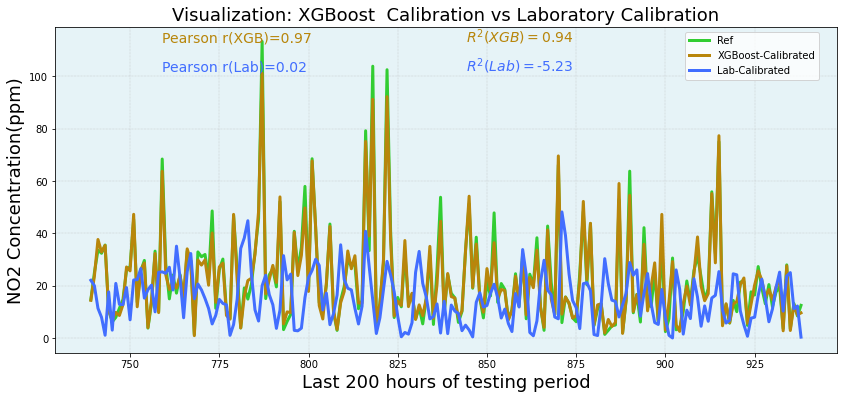

In [62]:
fig= plt.figure(figsize=(14,6))
index=[i for i in range(len(y_test))]
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index[A:],y_test[A:], color='limegreen',linewidth=3)
plt.plot(index[A:],pred[A:], color='darkgoldenrod',linewidth=3)
plt.plot(index[A:],lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'XGBoost-Calibrated', 'Lab-Calibrated'], loc = 2, bbox_to_anchor = (0.8,1))
plt.ylabel('NO2 Concentration(ppm)',fontsize=18)
plt.text(B-15, C, r'$R^{2}(XGB)=$'+str(R2_xgb_NO2), fontsize = 14, color='darkgoldenrod')
plt.text(B-15, D, r'$R^{2}(Lab)=$'+str(R2_lab_NO2), fontsize = 14, color='#426eff')
plt.text(B-100, C, 'Pearson r(XGB)='+str(Pearson_lr), fontsize = 14, color='darkgoldenrod')
plt.text(B-100, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
plt.xlabel('Last 200 hours of testing period',fontsize=18)
plt.title('Visualization: XGBoost  Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [63]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_XGB_NO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_XGB_NO2=CRMSE(y_test,pred)/np.std(y_test)
pred_xgb=pred

Regressor model performance:
Mean absolute error(MAE) = 2.59
Mean squared error(MSE) = 17.77
Median absolute error = 1.69
Explain variance score = 0.94
R2 score = 0.94


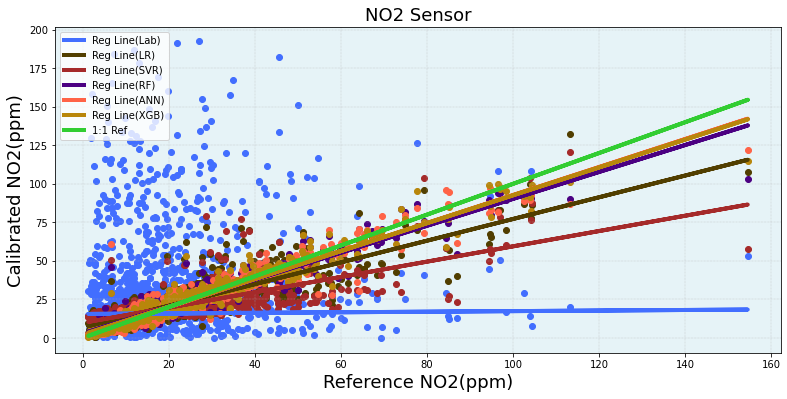

In [64]:
fig= plt.figure(figsize=(13,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
m0, b0 = np.polyfit(np.array(y_test), 0.4*np.array(lab1), 1)
plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
plt.scatter(np.array(y_test),np.array(lab1),color='#426eff')
plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00')
plt.scatter(np.array(y_test),np.array(pred_svr),color='brown')
plt.scatter(np.array(y_test),np.array(pred_rf),color='indigo')
plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato')
plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod')
ax.plot(y_test,y_test, c ="limegreen",linewidth=4)
plt.xlabel('Reference NO2(ppm)',fontsize=18)
plt.ylabel('Calibrated NO2(ppm)',fontsize=18)
plt.legend(['Reg Line(Lab)','Reg Line(LR)','Reg Line(SVR)','Reg Line(RF)','Reg Line(ANN)','Reg Line(XGB)'
            ,'1:1 Ref'], loc = 2, bbox_to_anchor = (0,1))
plt.title('NO2 Sensor',fontsize=18 )
plt.grid(linestyle='-.',linewidth=0.3)

 # SO2 Calibration

In [65]:
import pandas as pd
import scipy.io
import numpy as np
mat = scipy.io.loadmat('So2final.mat')

L_SO2final=[]
for i in range(len(mat['SO2final'])):
    L_SO2final.append(list(mat['SO2final'][i]))

SO2_data=pd.DataFrame(L_SO2final,columns=['Lab1', 'Lab2','Lab3','Lab4','Temp','RH','Ref','Time'])
Time=SO2_data['Time'].to_list()
Time=np.array(Time)
Date=pd.to_datetime(Time-719529,unit='d').round('h')
SO2_data['Date'] = Date.tolist()
SO2_data=SO2_data.set_index('Date')
SO2_data.drop('Time',axis = 1, inplace = True)

mat = scipy.io.loadmat('SO2_raw.mat')

L_SO2_raw=[]
for i in range(len(mat['SO2_raw'])):
    L_SO2_raw.append(list(mat['SO2_raw'][i]))

SO2_raw=pd.DataFrame(L_SO2_raw,columns=['WE', 'AE','Temp','RH','Time'])
SO2_raw.head()
SO2_data.insert(loc = 0,
          column = 'WE',
          value = SO2_raw['WE'].to_list())

SO2_data.insert(loc = 1,
          column = 'AE',
          value = SO2_raw['AE'].to_list())


SO2_data=SO2_data.interpolate()
WE=np.array(SO2_data['WE'].to_list())
AE=np.array(SO2_data['AE'].to_list())
Signal=list(WE-AE)
SO2_data.insert(loc = 2,
          column = 'Signal',
          value = Signal)

SO2_data.head()

WE          AE      Signal        Lab1  \
Date                                                                  
2019-10-02 12:00:00  511.980000  375.956250  136.023750  336.491001   
2019-10-02 13:00:00  511.980000  508.330476    3.649524 -339.232168   
2019-10-02 16:00:00  511.980000  442.351642   69.628358  -77.358106   
2019-10-02 17:00:00  435.447463  352.494627   82.952836  221.907307   
2019-10-03 16:00:00  358.812857  336.112857   22.700000   84.566512   

                           Lab2        Lab3         Lab4       Temp  \
Date                                                                  
2019-10-02 12:00:00  395.131511  258.535708  -624.848616  26.378438   
2019-10-02 13:00:00  -68.687897 -313.588071  -619.380130  25.502791   
2019-10-02 16:00:00  108.340330 -219.979244  -680.245645  30.827910   
2019-10-02 17:00:00  244.067240  121.645425  -897.011152  30.047164   
2019-10-03 16:00:00   77.784764  -11.080530 -1118.485141  29.441429   

                            RH       Ref  
Date                                      
2019-10-02 12:00:00  58.063437  1.701245  
2019-10-02 13:00:00  59.868837  1.495635  
2019-10-02 16:00:00  49.008060  1.102313  
2019-10-02 17:00:00  51.259851  1.383004  
2019-10-03 16:00:00  52.018571  1.402984

In [66]:
SO2_data.shape

(6021, 10)

In [67]:
SO2_data.describe()

WE           AE       Signal         Lab1         Lab2  \
count  6021.000000  6021.000000  6021.000000  6021.000000  6021.000000   
mean    346.317991   343.672928     2.645063     4.426280    10.876447   
std      11.844320     5.652805     9.278214    31.465055    27.662360   
min     327.665107   336.112857   -19.034635  -961.004985  -505.040176   
25%     339.505000   341.720921    -3.212714   -10.826914    -5.415598   
50%     343.395667   342.801650     0.383073     0.567498     5.306895   
75%     349.409378   344.366921     5.712667    15.114913    20.328606   
max     511.984380   511.984380   137.776860   413.434407   419.568327   

              Lab3         Lab4         Temp           RH          Ref  
count  6021.000000  6021.000000  6021.000000  6021.000000  6021.000000  
mean    -89.010607 -1120.030522    18.258139    67.305016     1.715263  
std      34.530699    64.509983     7.601563    18.453999     0.995402  
min   -1302.528007 -1777.717366     1.035000    11.428168    -0.742694  
25%    -103.105554 -1127.334289    12.409531    53.576341     1.092307  
50%     -92.472035 -1115.412344    16.872568    72.220802     1.523944  
75%     -78.691378 -1099.959520    22.849585    82.938548     2.061193  
max     322.268946  -599.346047    44.748056    93.012486    18.687856

In [68]:
SO2_data['Month']=SO2_data.index.month
SO2_data['Day_of_week']=SO2_data.index.dayofweek
SO2_data['Day']=SO2_data.index.day
SO2_data['Hour']=SO2_data.index.hour

SO2_data['Ref_CO']=CO_data['Ref'].to_list()
SO2_data['Ref_NO2']=NO2_data['Ref'].to_list()
SO2_data['Ref_O3']=O3_data['Ref'].to_list()
SO2_Data=SO2_data[['Signal','Ref_CO','Ref_NO2','Ref_O3','Lab1','Temp','RH','Ref','Month','Day_of_week','Day','Hour']]
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
#CO_data=CO_data.resample('D').mean()
SO2_Data=SO2_Data.dropna() 
SO2_Data.shape

(2794, 12)

# Model 1: Linear Regression (LR)

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
X=SO2_Data[['Signal','Ref_CO','Ref_NO2','Ref_O3','Temp','RH','Month','Day_of_week','Day','Hour']]
y=SO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X_test)


559

In [70]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)
pred = model.predict(X_test)
lab1=SO2_Data['Lab1'].to_list()[len(y_train):]
index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =index)
Y_test
Pred=pd.Series(pred,index =index)
Lab1=pd.Series(lab1,index =index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_lr_SO2=sMAPE_lr
RMSE_lr_SO2=RMSE_lr/np.mean(np.array(y_test))
Pearson_lr_SO2=Pearson_lr
sMAPE_lab_SO2=sMAPE_lab
RMSE_lab_SO2=RMSE_lab/np.mean(np.array(lab1))
Pearson_lab_SO2=Pearson_lab
R2_lr_SO2=round(sm.r2_score(y_test, pred), 2)
R2_lab_SO2=round(sm.r2_score(y_test, lab1), 2)
RMSE_Lr_SO2=RMSE_lr
RMSE_Lab_SO2=RMSE_lab



## Scaling Laboratory Calibration
For the purpose of visual comparison with the ref and calibrated measurements, the lab measurement was scaled by a factor of 0.05

In [71]:
LAB1=0.05*np.array(Lab1)
A=len(y_test)-200
D=max(LAB1[A:])-0.2*max(LAB1[A:])
C=max(LAB1[A:])-0.1*max(LAB1[A:])
B=A+120

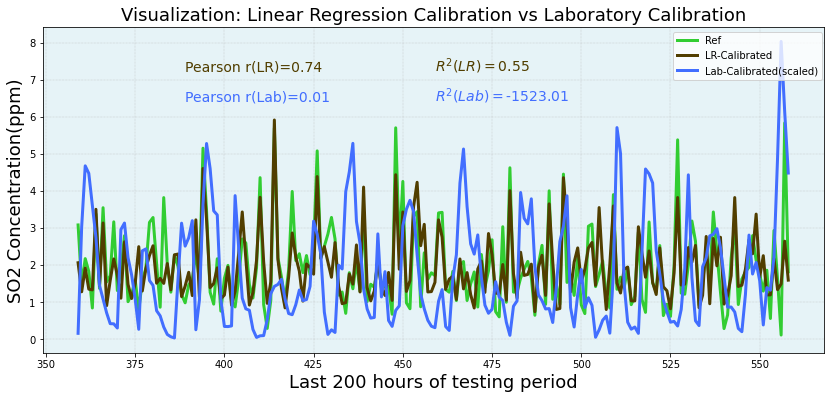

In [72]:
fig= plt.figure(figsize=(14,6))
index=[i for i in range(len(y_test))]
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index[A:],y_test[A:], color='limegreen',linewidth=3)
plt.plot(index[A:],pred[A:], color='#513e00',linewidth=3)
plt.plot(index[A:],LAB1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'LR-Calibrated', 'Lab-Calibrated(scaled)'], loc = 2, bbox_to_anchor = (0.8,1))
plt.ylabel('SO2 Concentration(ppm)',fontsize=18)
plt.text(B-20, C, r'$R^{2}(LR)=$'+str(R2_lr_SO2), fontsize = 14, color='#513e00')
plt.text(B-20, D, r'$R^{2}(Lab)=$'+str(R2_lab_SO2), fontsize = 14, color='#426eff')
plt.text(B-90, C, 'Pearson r(LR)='+str(Pearson_lr), fontsize = 14, color='#513e00')
plt.text(B-90, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
plt.xlabel('Last 200 hours of testing period',fontsize=18)
plt.title('Visualization: Linear Regression Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()


In [73]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))
MBE_LR_SO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_LR_SO2=CRMSE(y_test,pred)/np.std(y_test)
MBE_LAB_SO2=MBE(lab1,y_test)/(25*np.std(y_test))
CRMSE_LAB_SO2=CRMSE(y_test,lab1)/25*(np.std(y_test))
pred_lr=pred

Regressor model performance:
Mean absolute error(MAE) = 0.49
Mean squared error(MSE) = 0.45
Median absolute error = 0.37
Explain variance score = 0.55
R2 score = 0.55


# Model 2: SVR

In [74]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
regressor = SVR(kernel = 'poly',degree=3)
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)

In [75]:
lab1=SO2_Data['Lab1'].to_list()[len(y_train):]
index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =index)
Y_test
Pred=pd.Series(pred,index =index)
Lab1=pd.Series(lab1,index =index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_svr_SO2=sMAPE_lr
RMSE_svr_SO2=RMSE_lr/np.mean(np.array(y_test))
Pearson_svr_SO2=Pearson_lr
R2_svr_SO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Svr_SO2=RMSE_lr

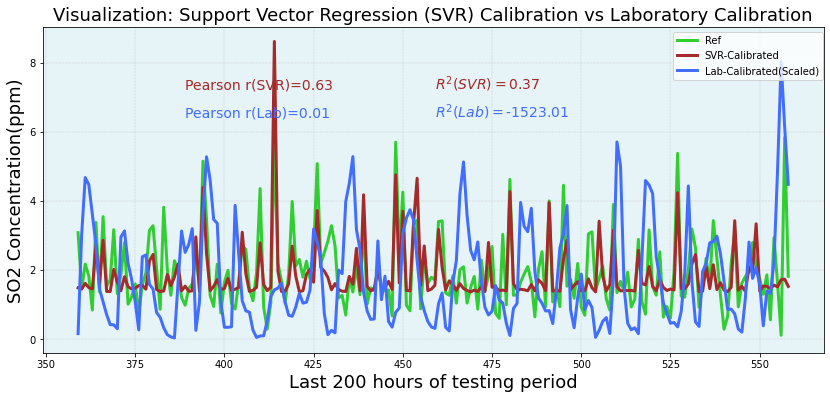

In [76]:
fig= plt.figure(figsize=(14,6))
index=[i for i in range(len(y_test))]
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index[A:],y_test[A:], color='limegreen',linewidth=3)
plt.plot(index[A:],pred[A:], color='brown',linewidth=3)
plt.plot(index[A:],LAB1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'SVR-Calibrated', 'Lab-Calibrated(Scaled)'], loc = 2, bbox_to_anchor = (0.8,1))
plt.ylabel('SO2 Concentration(ppm)',fontsize=18)
plt.text(B-20, C,r'$R^{2}(SVR)=$'+str(R2_svr_SO2) , fontsize = 14, color='brown')
plt.text(B-20, D, r'$R^{2}(Lab)=$'+str(R2_lab_SO2), fontsize = 14, color='#426eff')
plt.text(B-90, C, 'Pearson r(SVR)='+str(Pearson_lr), fontsize = 14, color='brown')
plt.text(B-90, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
plt.xlabel('Last 200 hours of testing period',fontsize=18)
plt.title('Visualization: Support Vector Regression (SVR) Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [77]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_SVR_SO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_SVR_SO2=CRMSE(y_test,pred)/np.std(y_test)
pred_svr=pred

Regressor model performance:
Mean absolute error(MAE) = 0.55
Mean squared error(MSE) = 0.62
Median absolute error = 0.4
Explain variance score = 0.39
R2 score = 0.37


 # Model 3: Random Forest

In [78]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 500, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train)  

RandomForestRegressor(n_estimators=500, random_state=0)

In [79]:
features_SO2=regressor.feature_importances_
pred = regressor.predict(X_test)
lab1=SO2_Data['Lab1'].to_list()[len(y_train):]
index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =index)
Y_test
Pred=pd.Series(pred,index =index)
Lab1=pd.Series(lab1,index =index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_rf_SO2=sMAPE_lr
RMSE_rf_SO2=RMSE_lr/np.mean(np.array(y_test))
Pearson_rf_SO2=Pearson_lr
R2_rf_SO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Rf_SO2=RMSE_lr

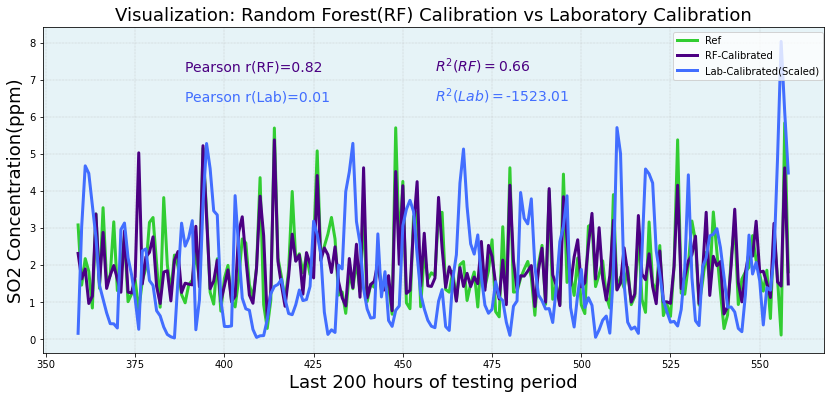

In [80]:
fig= plt.figure(figsize=(14,6))
index=[i for i in range(len(y_test))]
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index[A:],y_test[A:], color='limegreen',linewidth=3)
plt.plot(index[A:],pred[A:], color='indigo',linewidth=3)
plt.plot(index[A:],LAB1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'RF-Calibrated', 'Lab-Calibrated(Scaled)'], loc = 2, bbox_to_anchor = (0.8,1))
plt.ylabel('SO2 Concentration(ppm)',fontsize=18)
plt.text(B-20, C,r'$R^{2}(RF)=$'+str(R2_rf_SO2) , fontsize = 14, color='indigo')
plt.text(B-20, D,r'$R^{2}(Lab)=$'+str(R2_lab_SO2) , fontsize = 14, color='#426eff')
plt.text(B-90, C, 'Pearson r(RF)='+str(Pearson_lr), fontsize = 14, color='indigo')
plt.text(B-90, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
plt.xlabel('Last 200 hours of testing period',fontsize=18)
plt.title('Visualization: Random Forest(RF) Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [81]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_RF_SO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_RF_SO2=CRMSE(y_test,pred)/np.std(y_test)
pred_rf=pred

Regressor model performance:
Mean absolute error(MAE) = 0.39
Mean squared error(MSE) = 0.33
Median absolute error = 0.27
Explain variance score = 0.66
R2 score = 0.66


# Model 4 : ANN

In [82]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.preprocessing import StandardScaler
model = Sequential()
model.add(Dense(6, input_shape = (10,),kernel_initializer='normal', activation= 'linear'))
model.add(Dense(128,kernel_initializer='normal', activation= 'relu'))
model.add(Dense(50, kernel_initializer='normal',activation= 'relu'))
#model.add(Dense(100, kernel_initializer='normal',activation= 'relu'))
model.add(Dense(1,kernel_initializer='normal',activation='linear',))
sgd = optimizers.Adam(learning_rate=0.01)

model.compile(optimizer = sgd, loss = 'mean_squared_error', metrics= ['mse', 'mae'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 6)                 66        
_________________________________________________________________
dense_11 (Dense)             (None, 128)               896       
_________________________________________________________________
dense_12 (Dense)             (None, 50)                6450      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 51        
Total params: 7,463
Trainable params: 7,463
Non-trainable params: 0
_________________________________________________________________


In [83]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
model.fit(X_train_scaled, y_train, batch_size= 200, epochs=100, verbose= 0)

In [84]:
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)
pred=[]
for i in range(len(test_pred)):
    pred.append(sum(list(test_pred[i])))
len(y_test)

559

In [85]:
lab1=SO2_Data['Lab1'].to_list()[len(y_train):]
index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =index)
Y_test
Pred=pd.Series(pred,index =index)
Lab1=pd.Series(lab1,index =index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_ann_SO2=sMAPE_lr
RMSE_ann_SO2=RMSE_lr/np.mean(np.array(y_test))
Pearson_ann_SO2=Pearson_lr
R2_ann_SO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Ann_SO2=RMSE_lr

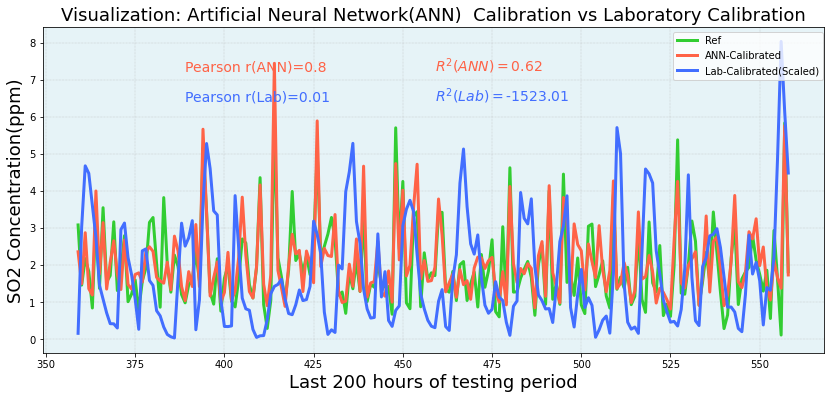

In [86]:
fig= plt.figure(figsize=(14,6))
index=[i for i in range(len(y_test))]
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index[A:],y_test[A:], color='limegreen',linewidth=3)
plt.plot(index[A:],pred[A:], color='tomato',linewidth=3)
plt.plot(index[A:],LAB1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'ANN-Calibrated', 'Lab-Calibrated(Scaled)'], loc = 2, bbox_to_anchor = (0.8,1))
plt.ylabel('SO2 Concentration(ppm)',fontsize=18)
plt.text(B-20, C,r'$R^{2}(ANN)=$'+str(R2_ann_SO2) , fontsize = 14, color='tomato')
plt.text(B-20, D,r'$R^{2}(Lab)=$'+str(R2_lab_SO2) , fontsize = 14, color='#426eff')
plt.text(B-90, C, 'Pearson r(ANN)='+str(Pearson_lr), fontsize = 14, color='tomato')
plt.text(B-90, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
plt.xlabel('Last 200 hours of testing period',fontsize=18)
plt.title('Visualization: Artificial Neural Network(ANN)  Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [87]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_ANN_SO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_ANN_SO2=CRMSE(y_test,pred)/np.std(y_test)
pred_ann=pred

Regressor model performance:
Mean absolute error(MAE) = 0.44
Mean squared error(MSE) = 0.37
Median absolute error = 0.31
Explain variance score = 0.63
R2 score = 0.62


# Model 5 : XGBoost

In [88]:
from xgboost import  XGBRegressor
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# create an xgboost regression model
#n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9,colsample_bytree=0.4,alpha=10
model = XGBRegressor(n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9, 
                     colsample_bytree=0.4,alpha=10)

model.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, eta=0.01, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [89]:
pred = model.predict(X_test)
index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =index)
Y_test
Pred=pd.Series(pred,index =index)
Lab1=pd.Series(lab1,index =index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_xgb_SO2=sMAPE_lr
RMSE_xgb_SO2=RMSE_lr/np.mean(np.array(y_test))
Pearson_xgb_SO2=Pearson_lr
R2_xgb_SO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Xgb_SO2=RMSE_lr

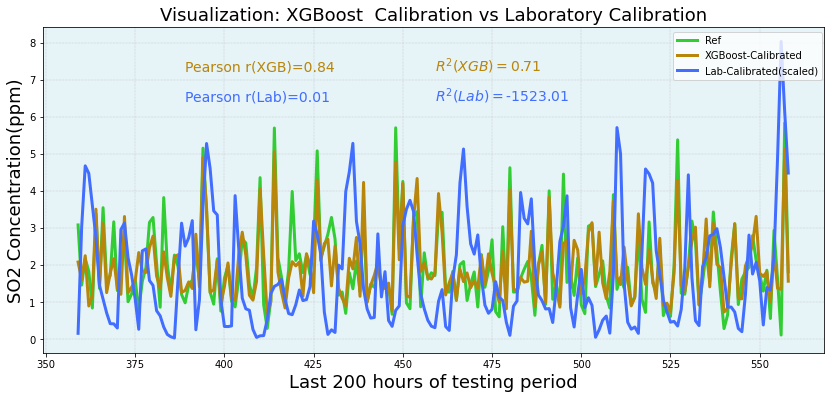

In [90]:
fig= plt.figure(figsize=(14,6))
index=[i for i in range(len(y_test))]
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index[A:],y_test[A:], color='limegreen',linewidth=3)
plt.plot(index[A:],pred[A:], color='darkgoldenrod',linewidth=3)
plt.plot(index[A:],LAB1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'XGBoost-Calibrated', 'Lab-Calibrated(scaled)'], loc = 2, bbox_to_anchor = (0.8,1))
plt.ylabel('SO2 Concentration(ppm)',fontsize=18)
plt.text(B-20, C,r'$R^{2}(XGB)=$'+str(R2_xgb_SO2) , fontsize = 14, color='darkgoldenrod')
plt.text(B-20, D,r'$R^{2}(Lab)=$'+str(R2_lab_SO2), fontsize = 14, color='#426eff')
plt.text(B-90, C, 'Pearson r(XGB)='+str(Pearson_lr), fontsize = 14, color='darkgoldenrod')
plt.text(B-90, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
plt.xlabel('Last 200 hours of testing period',fontsize=18)
plt.title('Visualization: XGBoost  Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [91]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_XGB_SO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_XGB_SO2=CRMSE(y_test,pred)/np.std(y_test)
pred_xgb=pred

Regressor model performance:
Mean absolute error(MAE) = 0.37
Mean squared error(MSE) = 0.28
Median absolute error = 0.26
Explain variance score = 0.71
R2 score = 0.71


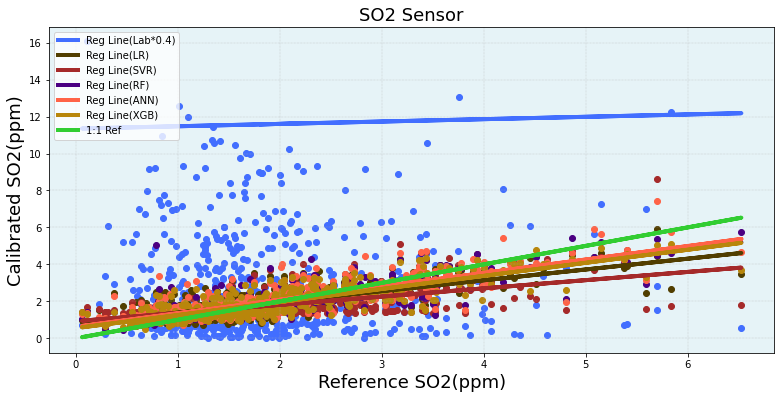

In [92]:
import seaborn as sns
fig= plt.figure(figsize=(13,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
m0, b0 = np.polyfit(np.array(y_test), 0.4*np.array(lab1), 1)
plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)

m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
plt.scatter(np.array(y_test),0.1*np.array(lab1),color='#426eff')
plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00')
plt.scatter(np.array(y_test),np.array(pred_svr),color='brown')
plt.scatter(np.array(y_test),np.array(pred_rf),color='indigo')
plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato')
plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod')
ax.plot(y_test,y_test, c ="limegreen",linewidth=4)
plt.xlabel('Reference SO2(ppm)',fontsize=18)
plt.ylabel('Calibrated SO2(ppm)',fontsize=18)
plt.legend(['Reg Line(Lab*0.4)','Reg Line(LR)','Reg Line(SVR)','Reg Line(RF)','Reg Line(ANN)','Reg Line(XGB)'
            ,'1:1 Ref'], loc = 2, bbox_to_anchor = (0,1))
plt.title('SO2 Sensor',fontsize=18 )
plt.grid(linestyle='-.',linewidth=0.3)

# O3 CALIBRATION

In [93]:
import pandas as pd
import scipy.io
import numpy as np
mat= scipy.io.loadmat('O3.mat')
L_O3final=[]
for i in range(len(mat['O3final_1'])):
    L_O3final.append(list(mat['O3final_1'][i]))

O3_data=pd.DataFrame(L_O3final,columns=['Lab1', 'Lab2','Lab3','Lab4','Temp','RH','Ref','Time'])
Time=O3_data['Time'].to_list()
Time=np.array(Time)
Date=pd.to_datetime(Time-719529,unit='d').round('h')
O3_data['Date'] = Date.tolist()
O3_data=O3_data.set_index('Date')
O3_data.drop('Time',axis = 1, inplace = True)

mat = scipy.io.loadmat('O3_raw.mat')

L_O3_raw=[]
for i in range(len(mat['O3_raw'])):
    L_O3_raw.append(list(mat['O3_raw'][i]))

O3_raw=pd.DataFrame(L_O3_raw,columns=['WE', 'AE','Temp','RH','Time'])
O3_raw.head()
O3_data.insert(loc = 0,
          column = 'WE',
          value = O3_raw['WE'].to_list())

O3_data.insert(loc = 1,
          column = 'AE',
          value = O3_raw['AE'].to_list())


O3_data=O3_data.interpolate()
WE=np.array(O3_data['WE'].to_list())
AE=np.array(O3_data['AE'].to_list())
Signal=list(WE-AE)
O3_data.insert(loc = 2,
          column = 'Signal',
          value = Signal)
O3_data.head()

WE          AE     Signal         Lab1  \
Date                                                                  
2019-10-02 12:00:00  229.020000  232.625625  -3.605625   621.625704   
2019-10-02 13:00:00  284.284762  207.033333  77.251429  1835.510709   
2019-10-02 16:00:00  199.551940  131.729254  67.822687  2195.698656   
2019-10-02 17:00:00  234.016418  225.462090   8.554328   386.251890   
2019-10-03 16:00:00  234.671429  229.311429   5.360000   200.100352   

                           Lab2        Lab3         Lab4       Temp  \
Date                                                                  
2019-10-02 12:00:00   67.962148  -12.822516  -987.063805  26.378438   
2019-10-02 13:00:00  293.683054  159.572059 -1331.518231  25.502791   
2019-10-02 16:00:00  615.567710  379.302767  -893.337914  30.827910   
2019-10-02 17:00:00  108.049071   34.461730  -696.227364  30.047164   
2019-10-03 16:00:00  122.550133   72.885162  -587.216200  29.441429   

                            RH        Ref  
Date                                       
2019-10-02 12:00:00  58.063437  52.449447  
2019-10-02 13:00:00  59.868837  50.464425  
2019-10-02 16:00:00  49.008060  37.972231  
2019-10-02 17:00:00  51.259851  33.446343  
2019-10-03 16:00:00  52.018571  33.071706

In [94]:
O3_data['Month']=O3_data.index.month
O3_data['Day_of_week']=O3_data.index.dayofweek
O3_data['Day']=O3_data.index.day
O3_data['Hour']=O3_data.index.hour

O3_data['Ref_CO']=CO_data['Ref'].to_list()
O3_data['Ref_NO2']=NO2_data['Ref'].to_list()
O3_data['Ref_SO2']=SO2_data['Ref'].to_list()
O3_Data=O3_data[['Signal','Ref_CO','Ref_NO2','Ref_SO2','Lab1','Temp','RH','Ref','Month','Day_of_week','Day','Hour']]
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
#CO_data=CO_data.resample('D').mean()
O3_Data=O3_Data.dropna() 
O3_Data.shape

(733, 12)

## Model 1: LR

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
X=O3_Data[['Signal','Ref_CO','Ref_NO2','Ref_SO2','Temp','RH','Month','Day_of_week','Day','Hour']]
y=O3_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X_test)


147

In [96]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)
pred = model.predict(X_test)
lab1=O3_Data['Lab1'].to_list()[len(y_train):]
index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =index)
Y_test
Pred=pd.Series(pred,index =index)
Lab1=pd.Series(lab1,index =index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_lr_O3=sMAPE_lr
RMSE_lr_O3=RMSE_lr/np.mean(np.array(y_test))
Pearson_lr_O3=Pearson_lr
sMAPE_lab_O3=sMAPE_lab
RMSE_lab_O3=RMSE_lab/np.mean(np.array(lab1))
Pearson_lab_O3=Pearson_lab
R2_lr_O3=round(sm.r2_score(y_test, pred), 2)
R2_lab_O3=round(sm.r2_score(y_test, lab1), 2)
RMSE_Lr_O3=RMSE_lr
RMSE_Lab_O3=RMSE_lab

A=len(y_test)
D=max(lab1)-0.2*max(lab1)
C=max(lab1)-0.1*max(lab1)
B=100



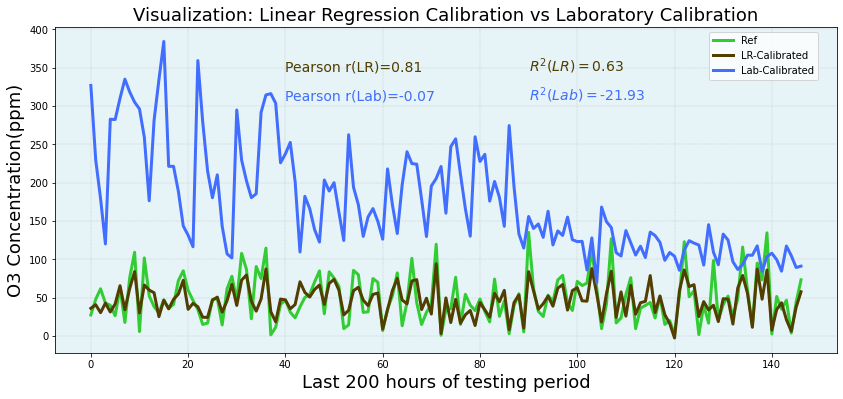

In [97]:
fig= plt.figure(figsize=(14,6))
index=[i for i in range(len(y_test))]
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test, color='limegreen',linewidth=3)
plt.plot(index,pred, color='#513e00',linewidth=3)
plt.plot(index,lab1, color='#426eff',linewidth=3)
plt.legend(['Ref', 'LR-Calibrated', 'Lab-Calibrated'], loc = 2, bbox_to_anchor = (0.83,1))
plt.ylabel('O3 Concentration(ppm)',fontsize=18)
plt.text(B-10, C,r'$R^{2}(LR)=$'+str(R2_lr_O3) , fontsize = 14, color='#513e00')
plt.text(B-10, D,r'$R^{2}(Lab)=$'+str(R2_lab_O3) , fontsize = 14, color='#426eff')
plt.text(B-60, C, 'Pearson r(LR)='+str(Pearson_lr), fontsize = 14, color='#513e00')
plt.text(B-60, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
plt.xlabel('Last 200 hours of testing period',fontsize=18)
plt.title('Visualization: Linear Regression Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [98]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_LR_O3=MBE(pred,y_test)/np.std(y_test)
CRMSE_LR_O3=CRMSE(y_test,pred)/np.std(y_test)
MBE_LAB_O3=MBE(lab1,y_test)/(3.6*np.std(y_test))
CRMSE_LAB_O3=CRMSE(y_test,lab1)/(3.6*np.std(y_test))
pred_lr=pred

Regressor model performance:
Mean absolute error(MAE) = 14.32
Mean squared error(MSE) = 348.03
Median absolute error = 10.42
Explain variance score = 0.64
R2 score = 0.63


## Model 2: SVR

In [99]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
regressor = SVR(kernel = 'linear')
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)

In [100]:
lab1=O3_Data['Lab1'].to_list()[len(y_train):]
index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =index)
Y_test
Pred=pd.Series(pred,index =index)
Lab1=pd.Series(lab1,index =index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_svr_O3=sMAPE_lr
RMSE_svr_O3=RMSE_lr/np.mean(np.array(y_test))
Pearson_svr_O3=Pearson_lr
R2_svr_O3=round(sm.r2_score(y_test, pred), 2)
RMSE_Svr_O3=RMSE_lr

A=len(y_test)
D=max(lab1)-0.2*max(lab1)
C=max(lab1)-0.1*max(lab1)
B=100

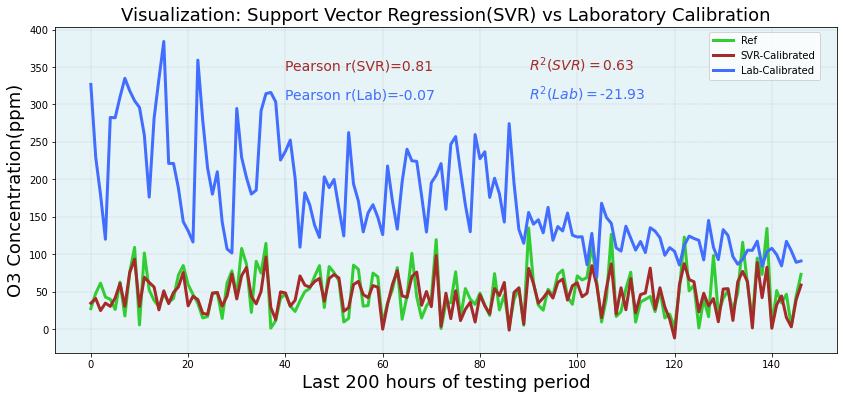

In [101]:
fig= plt.figure(figsize=(14,6))
index=[i for i in range(len(y_test))]
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test, color='limegreen',linewidth=3)
plt.plot(index,pred, color='brown',linewidth=3)
plt.plot(index,lab1, color='#426eff',linewidth=3)
plt.legend(['Ref', 'SVR-Calibrated', 'Lab-Calibrated'], loc = 2, bbox_to_anchor = (0.83,1))
plt.ylabel('O3 Concentration(ppm)',fontsize=18)
plt.text(B-10, C,r'$R^{2}(SVR)=$'+str(R2_svr_O3) , fontsize = 14, color='brown')
plt.text(B-10, D,r'$R^{2}(Lab)=$'+str(R2_lab_O3) , fontsize = 14, color='#426eff')
plt.text(B-60, C, 'Pearson r(SVR)='+str(Pearson_lr), fontsize = 14, color='brown')
plt.text(B-60, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
plt.xlabel('Last 200 hours of testing period',fontsize=18)
plt.title('Visualization: Support Vector Regression(SVR) vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [102]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_SVR_O3=MBE(pred,y_test)/np.std(y_test)
CRMSE_SVR_O3=CRMSE(y_test,pred)/np.std(y_test)
pred_svr=pred

Regressor model performance:
Mean absolute error(MAE) = 13.98
Mean squared error(MSE) = 344.0
Median absolute error = 10.85
Explain variance score = 0.65
R2 score = 0.63


##  Model 3 : Random Forest

In [103]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 500, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train)  

RandomForestRegressor(n_estimators=500, random_state=0)

In [104]:
features_O3=regressor.feature_importances_
pred = regressor.predict(X_test)
lab1=O3_Data['Lab1'].to_list()[len(y_train):]
index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =index)
Y_test
Pred=pd.Series(pred,index =index)
Lab1=pd.Series(lab1,index =index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_rf_O3=sMAPE_lr
RMSE_rf_O3=RMSE_lr/np.mean(np.array(y_test))
Pearson_rf_O3=Pearson_lr
R2_rf_O3=round(sm.r2_score(y_test, pred), 2)
RMSE_Rf_O3=RMSE_lr

A=len(y_test)
D=max(lab1)-0.2*max(lab1)
C=max(lab1)-0.1*max(lab1)
B=100




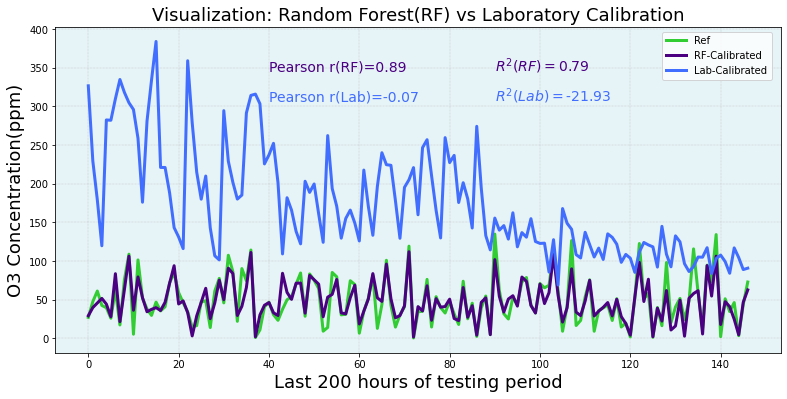

In [105]:
fig= plt.figure(figsize=(13,6))
index=[i for i in range(len(y_test))]
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
ax.plot(index,y_test, color='limegreen',linewidth=3)
ax.plot(index,pred, color='indigo',linewidth=3)
ax.plot(index,lab1, color='#426eff',linewidth=3)
plt.legend(['Ref', 'RF-Calibrated', 'Lab-Calibrated'], loc = 2, bbox_to_anchor = (0.83,1))
plt.ylabel('O3 Concentration(ppm)',fontsize=18)
plt.text(B-10, C,r'$R^{2}(RF)=$'+str(R2_rf_O3) , fontsize = 14, color='indigo')
plt.text(B-10, D,r'$R^{2}(Lab)=$'+str(R2_lab_O3) , fontsize = 14, color='#426eff')
plt.text(B-60, C, 'Pearson r(RF)='+str(Pearson_lr), fontsize = 14, color='indigo')
plt.text(B-60, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
plt.xlabel('Last 200 hours of testing period',fontsize=18)
plt.title('Visualization: Random Forest(RF) vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [106]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))


MBE_RF_O3=MBE(pred,y_test)/np.std(y_test)
CRMSE_RF_O3=CRMSE(y_test,pred)/np.std(y_test)
pred_rf=pred

Regressor model performance:
Mean absolute error(MAE) = 9.06
Mean squared error(MSE) = 197.73
Median absolute error = 4.96
Explain variance score = 0.79
R2 score = 0.79


## Model 4: ANN

In [107]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.preprocessing import StandardScaler
model = Sequential()
model.add(Dense(6, input_shape = (10,),kernel_initializer='normal', activation= 'linear'))
model.add(Dense(128,kernel_initializer='normal', activation= 'relu'))
model.add(Dense(128, kernel_initializer='normal',activation= 'relu'))
model.add(Dense(100, kernel_initializer='normal',activation= 'relu'))
model.add(Dense(1,kernel_initializer='normal',activation='linear',))
sgd = optimizers.Adam(learning_rate=0.01)

model.compile(optimizer = sgd, loss = 'mean_squared_error', metrics= ['mse', 'mae'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 6)                 66        
_________________________________________________________________
dense_15 (Dense)             (None, 128)               896       
_________________________________________________________________
dense_16 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_17 (Dense)             (None, 100)               12900     
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 101       
Total params: 30,475
Trainable params: 30,475
Non-trainable params: 0
_________________________________________________________________


In [108]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
model.fit(X_train_scaled, y_train, batch_size= 100, epochs=200, verbose= 0)

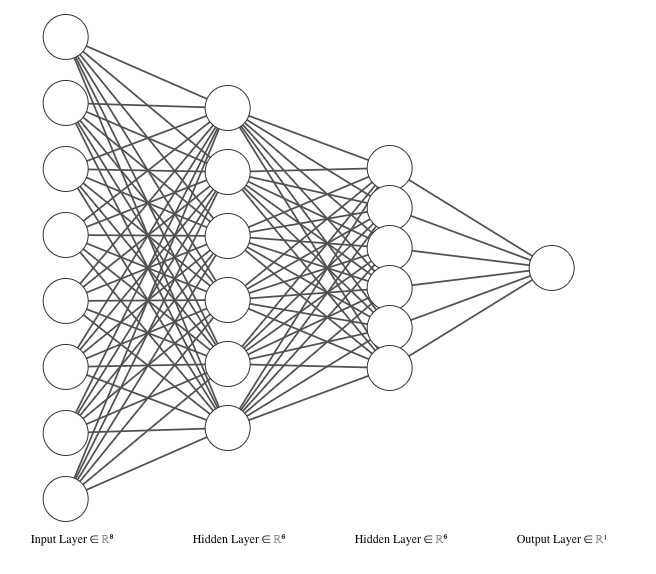

In [109]:
from IPython.display import Image
Image('NN.png')

In [110]:
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)
pred=[]
for i in range(len(test_pred)):
    pred.append(sum(list(test_pred[i])))
len(y_test)

147

In [111]:
lab1=O3_Data['Lab1'].to_list()[len(y_train):]
index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =index)
Y_test
Pred=pd.Series(pred,index =index)
Lab1=pd.Series(lab1,index =index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_ann_O3=sMAPE_lr
RMSE_ann_O3=RMSE_lr/np.mean(np.array(y_test))
Pearson_ann_O3=Pearson_lr
R2_ann_O3=round(sm.r2_score(y_test, pred), 2)
RMSE_Ann_O3=RMSE_lr


A=len(y_test)
D=max(lab1)-0.2*max(lab1)
C=max(lab1)-0.1*max(lab1)
B=100



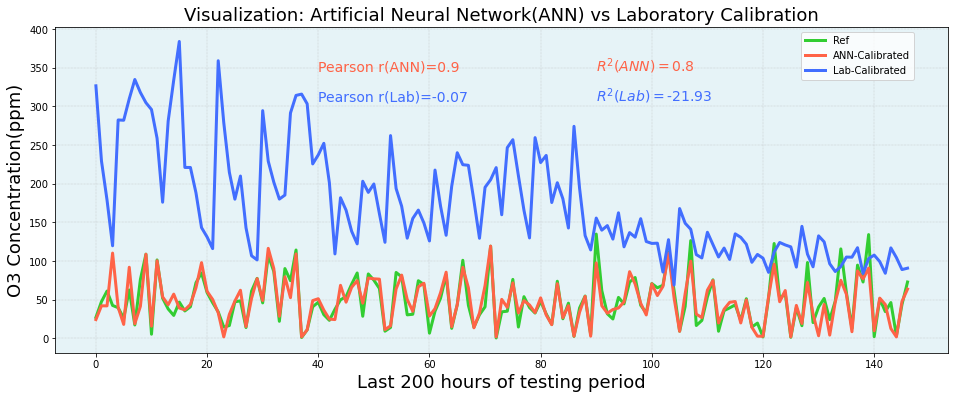

In [112]:
fig= plt.figure(figsize=(16,6))
index=[i for i in range(len(y_test))]
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
ax.plot(index,y_test, color='limegreen',linewidth=3)
ax.plot(index,pred, color='tomato',linewidth=3)
ax.plot(index,lab1, color='#426eff',linewidth=3)
plt.legend(['Ref', 'ANN-Calibrated', 'Lab-Calibrated'], loc = 2, bbox_to_anchor = (0.83,1))
plt.ylabel('O3 Concentration(ppm)',fontsize=18)
plt.text(B-10, C,r'$R^{2}(ANN)=$'+str(R2_ann_O3) , fontsize = 14, color='tomato')
plt.text(B-10, D, r'$R^{2}(Lab)=$'+str(R2_lab_O3), fontsize = 14, color='#426eff')
plt.text(B-60, C, 'Pearson r(ANN)='+str(Pearson_lr), fontsize = 14, color='tomato')
plt.text(B-60, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
plt.xlabel('Last 200 hours of testing period',fontsize=18)
plt.title('Visualization: Artificial Neural Network(ANN) vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [113]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_ANN_O3=MBE(pred,y_test)/np.std(y_test)
CRMSE_ANN_O3=CRMSE(y_test,pred)/np.std(y_test)
pred_ann=pred

Regressor model performance:
Mean absolute error(MAE) = 8.72
Mean squared error(MSE) = 186.31
Median absolute error = 4.51
Explain variance score = 0.8
R2 score = 0.8


# Model 5:  XGBoost

In [114]:
from xgboost import  XGBRegressor
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# create an xgboost regression model
#n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9,colsample_bytree=0.4,alpha=10
model = XGBRegressor(n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9, 
                     colsample_bytree=0.4,alpha=10)

model.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, eta=0.01, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [115]:
pred = model.predict(X_test)
index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =index)
Y_test
Pred=pd.Series(pred,index =index)
Lab1=pd.Series(lab1,index =index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_xgb_O3=sMAPE_lr
RMSE_xgb_O3=RMSE_lr/np.mean(np.array(y_test))
Pearson_xgb_O3=Pearson_lr
R2_xgb_O3=round(sm.r2_score(y_test, pred), 2)
RMSE_Xgb_O3=RMSE_lr


A=len(y_test)
D=max(lab1)-0.2*max(lab1)
C=max(lab1)-0.1*max(lab1)
B=100



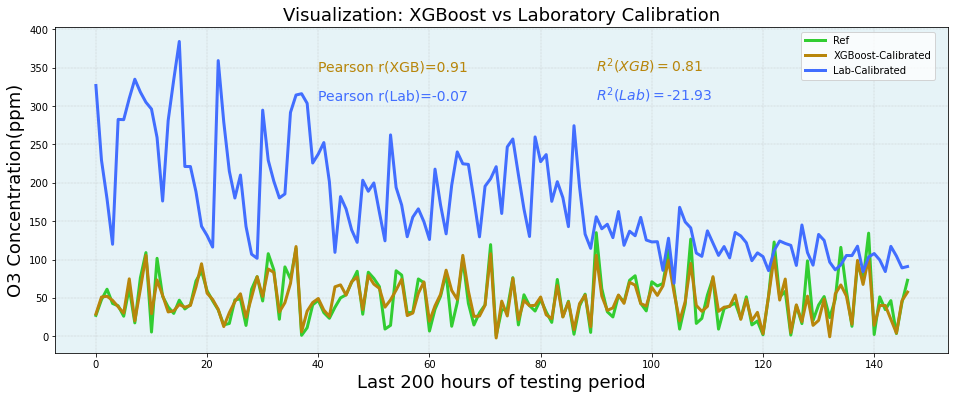

In [116]:
fig= plt.figure(figsize=(16,6))
index=[i for i in range(len(y_test))]
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
ax.plot(index,y_test, color='limegreen',linewidth=3)
ax.plot(index,pred, color='darkgoldenrod',linewidth=3)
ax.plot(index,lab1, color='#426eff',linewidth=3)
plt.legend(['Ref', 'XGBoost-Calibrated', 'Lab-Calibrated'], loc = 2, bbox_to_anchor = (0.83,1))
plt.ylabel('O3 Concentration(ppm)',fontsize=18)
plt.text(B-10, C,r'$R^{2}(XGB)=$'+str(R2_xgb_O3) , fontsize = 14, color='darkgoldenrod')
plt.text(B-10, D,r'$R^{2}(Lab)=$'+str(R2_lab_O3) , fontsize = 14, color='#426eff')
plt.text(B-60, C, 'Pearson r(XGB)='+str(Pearson_lr), fontsize = 14, color='darkgoldenrod')
plt.text(B-60, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
plt.xlabel('Last 200 hours of testing period',fontsize=18)
plt.title('Visualization: XGBoost vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [117]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))


MBE_XGB_O3=MBE(pred,y_test)/np.std(y_test)
CRMSE_XGB_O3=CRMSE(y_test,pred)/np.std(y_test)
pred_xgb=pred

Regressor model performance:
Mean absolute error(MAE) = 8.99
Mean squared error(MSE) = 181.21
Median absolute error = 5.47
Explain variance score = 0.81
R2 score = 0.81


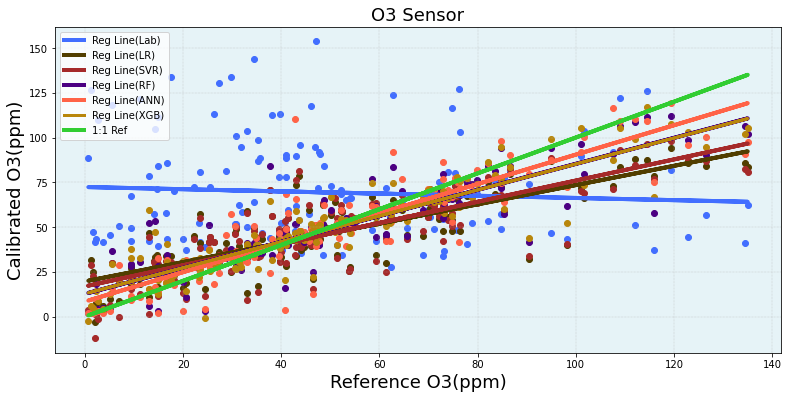

In [118]:
fig= plt.figure(figsize=(13,6))

ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)

m0, b0 = np.polyfit(np.array(y_test),0.4*np.array(lab1), 1)
plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=3)
plt.scatter(np.array(y_test),0.4*np.array(lab1),color='#426eff')
plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00')
plt.scatter(np.array(y_test),np.array(pred_svr),color='brown')
plt.scatter(np.array(y_test),np.array(pred_rf),color='indigo')
plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato')
plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod')
ax.plot(y_test,y_test, c ="limegreen",linewidth=4)
plt.xlabel('Reference O3(ppm)',fontsize=18)
plt.ylabel('Calibrated O3(ppm)',fontsize=18)
plt.legend(['Reg Line(Lab)','Reg Line(LR)','Reg Line(SVR)','Reg Line(RF)','Reg Line(ANN)','Reg Line(XGB)'
            ,'1:1 Ref'], loc = 2, bbox_to_anchor = (0,1))
plt.title('O3 Sensor',fontsize=18 )
plt.grid(linestyle='-.',linewidth=0.3)

# Data Analytics

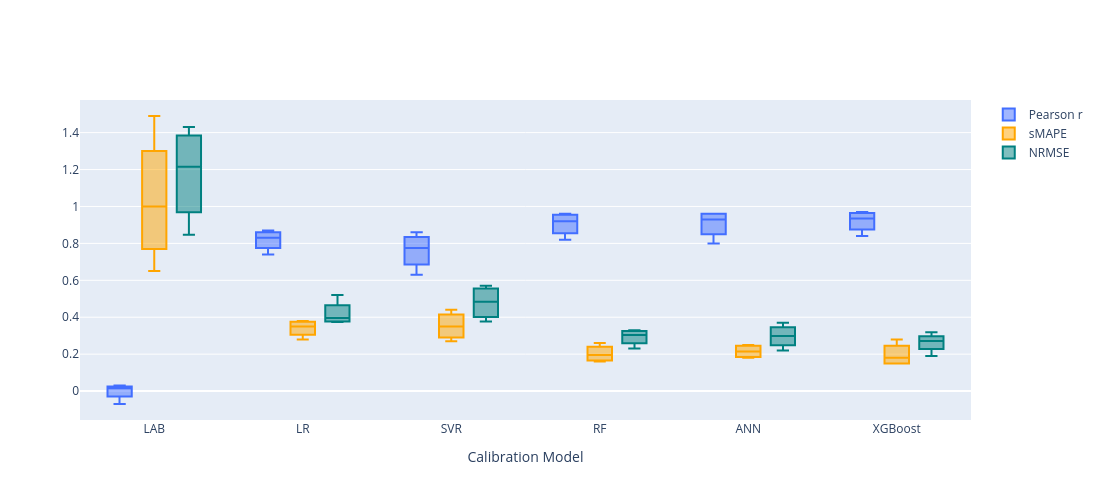

In [119]:
import chart_studio
import plotly.express as px
from IPython.display import Image
import plotly.graph_objects as go
import numpy as np

LAB_PR=[Pearson_lab_CO,Pearson_lab_NO2,Pearson_lab_SO2,Pearson_lab_O3]
LR_PR=[Pearson_lr_CO,Pearson_lr_NO2,Pearson_lr_SO2,Pearson_lr_O3]
SVR_PR=[Pearson_svr_CO,Pearson_svr_NO2,Pearson_svr_SO2,Pearson_svr_O3]
RF_PR=[Pearson_rf_CO,Pearson_rf_NO2,Pearson_rf_SO2,Pearson_rf_O3]
ANN_PR=[Pearson_ann_CO,Pearson_ann_NO2,Pearson_ann_SO2,Pearson_ann_O3]
XGB_PR=[Pearson_xgb_CO,Pearson_xgb_NO2,Pearson_xgb_SO2,Pearson_xgb_O3]


LAB_SM=[sMAPE_lab_CO,sMAPE_lab_NO2,sMAPE_lab_SO2,sMAPE_lab_O3]
LR_SM=[sMAPE_lr_CO,sMAPE_lr_NO2,sMAPE_lr_SO2,sMAPE_lr_O3]
SVR_SM=[sMAPE_svr_CO,sMAPE_svr_NO2,sMAPE_svr_SO2,sMAPE_svr_O3]
RF_SM=[sMAPE_rf_CO,sMAPE_rf_NO2,sMAPE_rf_SO2,sMAPE_rf_O3]
ANN_SM=[sMAPE_ann_CO,sMAPE_ann_NO2,sMAPE_ann_SO2,sMAPE_ann_O3]
XGB_SM=[sMAPE_xgb_CO,sMAPE_xgb_NO2,sMAPE_xgb_SO2,sMAPE_xgb_O3]

LAB_RM=[RMSE_lab_CO,RMSE_lab_NO2,RMSE_lab_SO2,RMSE_lab_O3]
LR_RM=[RMSE_lr_CO,RMSE_lr_NO2,RMSE_lr_SO2,RMSE_lr_O3]
SVR_RM=[RMSE_svr_CO,RMSE_svr_NO2,RMSE_svr_SO2,RMSE_svr_O3]
RF_RM=[RMSE_rf_CO,RMSE_rf_NO2,RMSE_rf_SO2,RMSE_rf_O3]
ANN_RM=[RMSE_ann_CO,RMSE_ann_NO2,RMSE_ann_SO2,RMSE_ann_O3]
XGB_RM=[RMSE_xgb_CO,RMSE_xgb_NO2,RMSE_xgb_SO2,RMSE_xgb_O3]

PR=LAB_PR+LR_PR+SVR_PR+RF_PR+ANN_PR+XGB_PR
SM=LAB_SM+LR_SM+SVR_SM+RF_SM+ANN_SM+XGB_SM
RM=LAB_RM+LR_RM+SVR_RM+RF_RM+ANN_RM+XGB_RM
x1=['LAB' for i in range(4)]
x2=['LR' for i in range(4)]
x3=['SVR' for i in range(4)]
x4=['RF' for i in range(4)]
x5=['ANN' for i in range(4)]
x6=['XGBoost' for i in range(4)]


x=x1+x2+x3+x4+x5+x6
fig = go.Figure() 

# Defining x axis
x = x
fig.add_trace(go.Box(
  
    # defining y axis in corresponding
    # to x-axis
    y=PR,
    x=x,
    name='Pearson r',
    marker_color='#426eff'
))
  
fig.add_trace(go.Box(
    y=SM,
    x=x,
    name='sMAPE',
    marker_color='orange'

))
fig.add_trace(go.Box(
    y=RM,
    x=x,
    name='NRMSE',
    marker_color='teal'

))

fig.update_layout(autosize=False,
    width=1100,
    height=500,
  
    # group together boxes of the different
    # traces for each value of x
    boxmode='group'
)

fig.update_xaxes(title_text="Calibration Model")
chart_studio.plotly.sign_in('vinylango', 'gybbJVWfRSUoTcRRSa6J')
chart_studio.plotly.image.save_as(fig, filename='models_boxplot.png')
Image('models_boxplot.png')

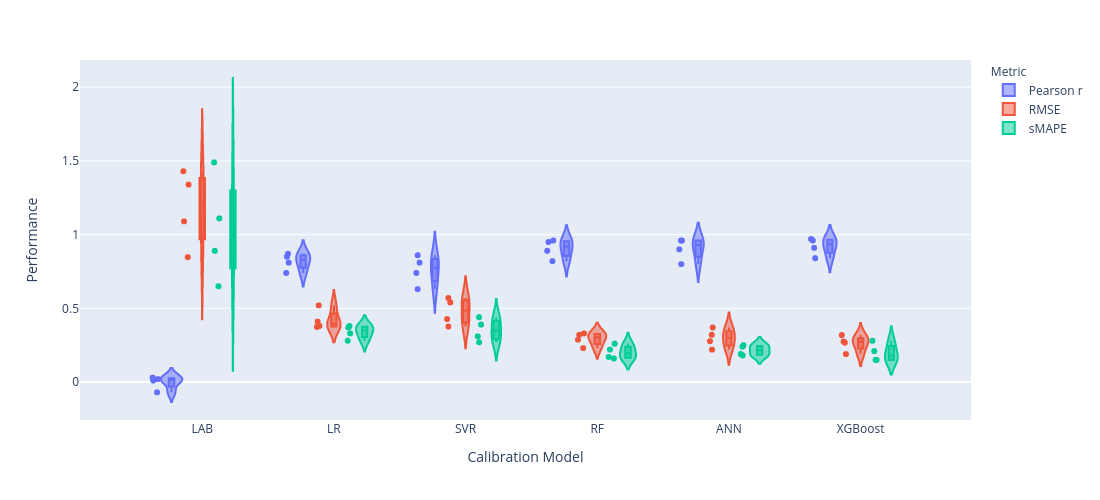

In [120]:
#Violin plot which also show the density of the distribution
import plotly.express as px
Metric1=['Pearson r' for i in range(len(PR))]
Metric2=['RMSE' for i in range(len(RM))]
Metric3=['sMAPE' for i in range(len(RM))]
Metric=Metric1+Metric2+Metric3
Model=x+x+x
Values=PR+RM+SM
lst=[[Model[i],Values[i],Metric[i]] for i in range(len(Model))]
df = pd.DataFrame(lst, columns =['Calibration Model', 'Performance','Metric'])

#fig = px.violin( df,y="Performance", x="Calibration Model", color='Metric', box=True,points="all",
          #hover_data=df.columns)
fig = px.violin( df,y="Performance", x="Calibration Model", color='Metric', box=True,points="all",
          hover_data=df.columns)


fig.update_layout(autosize=False,
    width=1100,
    height=500)
#fig.show()
chart_studio.plotly.sign_in('vinylango', 'gybbJVWfRSUoTcRRSa6J')
chart_studio.plotly.image.save_as(fig, filename='models_violinplots.png')
Image('models_violinplots.png')

## Target Diagrams

In [121]:
theta = np.linspace( 0 , 2 * np.pi , 150 )
 
radius = 1
 
a = radius * np.cos( theta )
b = radius * np.sin( theta )
CRMSE_LAB=[CRMSE_LAB_O3,CRMSE_LAB_CO,CRMSE_LAB_NO2,CRMSE_LAB_SO2]
CRMSE_LR=[CRMSE_LR_O3,CRMSE_LR_CO,CRMSE_LR_NO2,CRMSE_LR_SO2]
CRMSE_SVR=[CRMSE_SVR_O3,CRMSE_SVR_CO,CRMSE_SVR_NO2,CRMSE_SVR_SO2]
CRMSE_RF=[CRMSE_RF_O3,CRMSE_RF_CO,CRMSE_RF_NO2,CRMSE_RF_SO2]
CRMSE_ANN=[CRMSE_ANN_O3,CRMSE_ANN_CO,CRMSE_ANN_NO2,CRMSE_ANN_SO2]
CRMSE_XGB=[CRMSE_XGB_O3,CRMSE_XGB_CO,CRMSE_XGB_NO2,CRMSE_XGB_SO2]

MBE_LAB=[MBE_LAB_O3,MBE_LAB_CO,MBE_LAB_NO2,MBE_LAB_SO2]
MBE_LR=[MBE_LR_O3,MBE_LR_CO,MBE_LR_NO2,MBE_LR_SO2]
MBE_SVR=[MBE_SVR_O3,MBE_SVR_CO,MBE_SVR_NO2,MBE_SVR_SO2]
MBE_RF=[MBE_RF_O3,MBE_RF_CO,MBE_RF_NO2,MBE_RF_SO2]
MBE_ANN=[MBE_ANN_O3,MBE_ANN_CO,MBE_ANN_NO2,MBE_ANN_SO2]
MBE_XGB=[MBE_XGB_O3,MBE_XGB_CO,MBE_XGB_NO2,MBE_XGB_SO2]


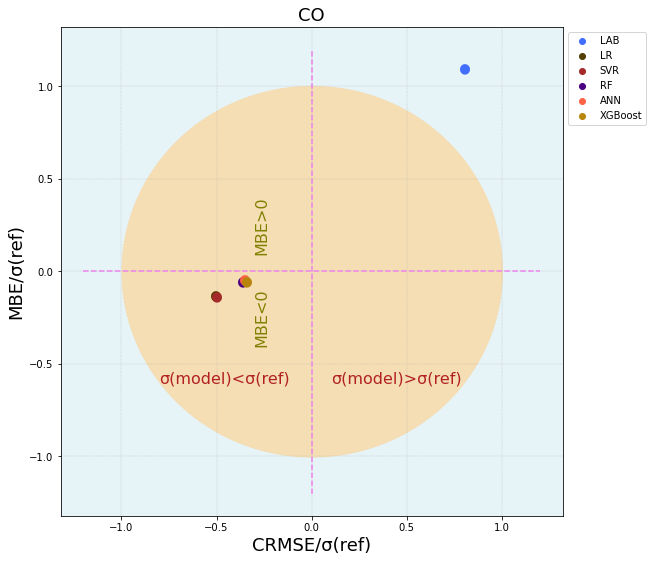

In [122]:
fig= plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.text(CRMSE_LAB[0],MBE_LAB[0] , '•', rotation=90, va='center',fontsize = 36, color='#426eff')
plt.text(CRMSE_LR[0],MBE_LR[0] , '•', rotation=90, va='center',fontsize = 36, color='#513e00')
plt.text(CRMSE_SVR[0],MBE_SVR[0] , '•', rotation=90, va='center',fontsize = 36, color='brown')
plt.text(CRMSE_RF[0],MBE_RF[0] , '•', rotation=90, va='center',fontsize = 36, color='indigo')
plt.text(CRMSE_ANN[0],MBE_ANN[0] , '•', rotation=90, va='center',fontsize = 36, color='tomato')
plt.text(CRMSE_XGB[0],MBE_XGB[0] , '•', rotation=90, va='center',fontsize = 36, color='darkgoldenrod')
plt.scatter(CRMSE_LAB[2]/1.1,MBE_LAB[2],color='#426eff')
plt.scatter(CRMSE_LR,MBE_LR,color='#513e00')
plt.scatter(CRMSE_SVR[0],MBE_SVR[0],color='brown')
plt.scatter(CRMSE_RF,MBE_RF,color='indigo')
plt.scatter(CRMSE_ANN,MBE_ANN,color='tomato')
plt.scatter(CRMSE_XGB,MBE_XGB,color='darkgoldenrod')
plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (1,1))

plt.Circle((0, 0), 1, color='wheat')
plt.vlines([0], -1.2, 1.2, linestyles='dashed',color='violet')
plt.hlines([0], -1.2, 1.2, linestyles='dashed', color='violet')
plt.text(-0.8, -0.6, 'σ(model)<σ(ref)', fontsize = 16, color='firebrick')
plt.text(0.1, -0.6, 'σ(model)>σ(ref)', fontsize = 16, color='firebrick')
plt.text(-0.3, -0.25, 'MBE<0', rotation=90, va='center',fontsize = 16, color='olive')
plt.text(-0.3, 0.25, 'MBE>0', rotation=90, va='center',fontsize = 16, color='olive')
plt.fill_between(a, b, color='wheat')
plt.xlabel('CRMSE/σ(ref)',fontsize=18)
plt.ylabel('MBE/σ(ref)',fontsize=18)
plt.title('CO',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

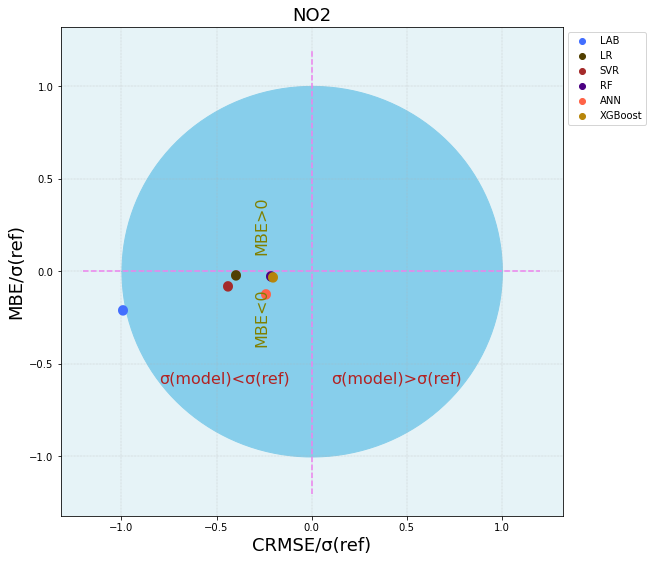

In [123]:
fig= plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.text(CRMSE_LAB[1],MBE_LAB[1] , '•', rotation=90, va='center',fontsize = 36, color='#426eff')
plt.text(CRMSE_LR[1],MBE_LR[1] , '•', rotation=90, va='center',fontsize = 36, color='#513e00')
plt.text(CRMSE_SVR[1],MBE_SVR[1] , '•', rotation=90, va='center',fontsize = 36, color='brown')
plt.text(CRMSE_RF[1],MBE_RF[1] , '•', rotation=90, va='center',fontsize = 36, color='indigo')
plt.text(CRMSE_ANN[1],MBE_ANN[1] , '•', rotation=90, va='center',fontsize = 36, color='tomato')
plt.text(CRMSE_XGB[1],MBE_XGB[1] , '•', rotation=90, va='center',fontsize = 36, color='darkgoldenrod')
plt.scatter(CRMSE_LAB[2]/1.1,MBE_LAB[2],color='#426eff')
plt.scatter(CRMSE_LR,MBE_LR,color='#513e00')
plt.scatter(CRMSE_SVR[0],MBE_SVR[0],color='brown')
plt.scatter(CRMSE_RF,MBE_RF,color='indigo')
plt.scatter(CRMSE_ANN,MBE_ANN,color='tomato')
plt.scatter(CRMSE_XGB,MBE_XGB,color='darkgoldenrod')
plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (1,1))
plt.Circle((0, 0), 1, color='wheat')
plt.vlines([0], -1.2, 1.2, linestyles='dashed',color='violet')
plt.hlines([0], -1.2, 1.2, linestyles='dashed', color='violet')
plt.text(-0.8, -0.6, 'σ(model)<σ(ref)', fontsize = 16, color='firebrick')
plt.text(0.1, -0.6, 'σ(model)>σ(ref)', fontsize = 16, color='firebrick')
plt.text(-0.3, -0.25, 'MBE<0', rotation=90, va='center',fontsize = 16, color='olive')
plt.text(-0.3, 0.25, 'MBE>0', rotation=90, va='center',fontsize = 16, color='olive')
plt.fill_between(a, b, color='skyblue')
plt.xlabel('CRMSE/σ(ref)',fontsize=18)
plt.ylabel('MBE/σ(ref)',fontsize=18)
plt.title('NO2',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

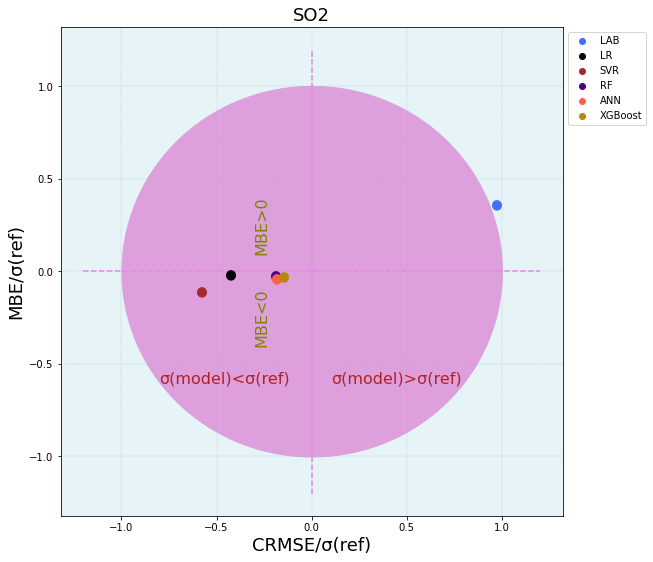

In [124]:
fig= plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.text(CRMSE_LAB[2],MBE_LAB[2] , '•', rotation=90, va='center',fontsize = 36, color='#426eff')
plt.text(CRMSE_LR[2],MBE_LR[2] , '•', rotation=90, va='center',fontsize = 36, color='black')
plt.text(CRMSE_SVR[2],MBE_SVR[2] , '•', rotation=90, va='center',fontsize = 36, color='brown')
plt.text(CRMSE_RF[2],MBE_RF[2] , '•', rotation=90, va='center',fontsize = 36, color='indigo')
plt.text(CRMSE_ANN[2],MBE_ANN[2] , '•', rotation=90, va='center',fontsize = 36, color='tomato')
plt.text(CRMSE_XGB[2],MBE_XGB[2] , '•', rotation=90, va='center',fontsize = 36, color='darkgoldenrod')
plt.scatter(CRMSE_LAB[2]/1.1,MBE_LAB[2],color='#426eff')
plt.scatter(CRMSE_LR,MBE_LR,color='black')
plt.scatter(CRMSE_SVR[0],MBE_SVR[0],color='brown')
plt.scatter(CRMSE_RF,MBE_RF,color='indigo')
plt.scatter(CRMSE_ANN,MBE_ANN,color='tomato')
plt.scatter(CRMSE_XGB,MBE_XGB,color='darkgoldenrod')
plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (1,1))
plt.Circle((0, 0), 1, color='wheat')
plt.vlines([0], -1.2, 1.2, linestyles='dashed',color='violet')
plt.hlines([0], -1.2, 1.2, linestyles='dashed', color='violet')
plt.text(-0.8, -0.6, 'σ(model)<σ(ref)', fontsize = 16, color='firebrick')
plt.text(0.1, -0.6, 'σ(model)>σ(ref)', fontsize = 16, color='firebrick')
plt.text(-0.3, -0.25, 'MBE<0', rotation=90, va='center',fontsize = 16, color='olive')
plt.text(-0.3, 0.25, 'MBE>0', rotation=90, va='center',fontsize = 16, color='olive')
plt.fill_between(a, b, color='plum')
plt.xlabel('CRMSE/σ(ref)',fontsize=18)
plt.ylabel('MBE/σ(ref)',fontsize=18)
plt.title('SO2',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

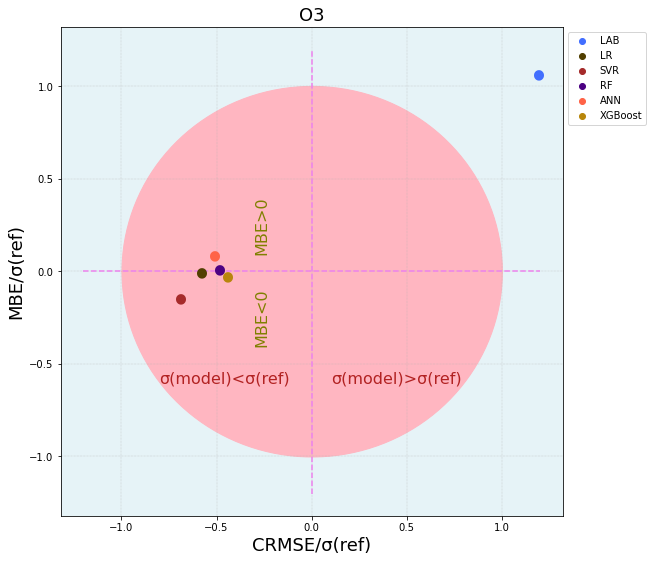

In [125]:
fig= plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.text(CRMSE_LAB[3],MBE_LAB[3] , '•', rotation=90, va='center',fontsize = 36, color='#426eff')
plt.text(CRMSE_LR[3],MBE_LR[3] , '•', rotation=90, va='center',fontsize = 36, color='#513e00')
plt.text(CRMSE_SVR[3],MBE_SVR[3] , '•', rotation=90, va='center',fontsize = 36, color='brown')
plt.text(CRMSE_RF[3],MBE_RF[3] , '•', rotation=90, va='center',fontsize = 36, color='indigo')
plt.text(CRMSE_ANN[3],MBE_ANN[3] , '•', rotation=90, va='center',fontsize = 36, color='tomato')
plt.text(CRMSE_XGB[3],MBE_XGB[3] , '•', rotation=90, va='center',fontsize = 36, color='darkgoldenrod')
plt.scatter(CRMSE_LAB[2]/1.1,MBE_LAB[2],color='#426eff')
plt.scatter(CRMSE_LR,MBE_LR,color='#513e00')
plt.scatter(CRMSE_SVR[0],MBE_SVR[0],color='brown')
plt.scatter(CRMSE_RF,MBE_RF,color='indigo')
plt.scatter(CRMSE_ANN,MBE_ANN,color='tomato')
plt.scatter(CRMSE_XGB,MBE_XGB,color='darkgoldenrod')
plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (1,1))
plt.Circle((0, 0), 1, color='wheat')
plt.vlines([0], -1.2, 1.2, linestyles='dashed',color='violet')
plt.hlines([0], -1.2, 1.2, linestyles='dashed', color='violet')
plt.text(-0.8, -0.6, 'σ(model)<σ(ref)', fontsize = 16, color='firebrick')
plt.text(0.1, -0.6, 'σ(model)>σ(ref)', fontsize = 16, color='firebrick')
plt.text(-0.3, -0.25, 'MBE<0', rotation=90, va='center',fontsize = 16, color='olive')
plt.text(-0.3, 0.25, 'MBE>0', rotation=90, va='center',fontsize = 16, color='olive')
plt.fill_between(a, b, color='lightpink')
plt.xlabel('CRMSE/σ(ref)',fontsize=18)
plt.ylabel('MBE/σ(ref)',fontsize=18)
plt.title('O3',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

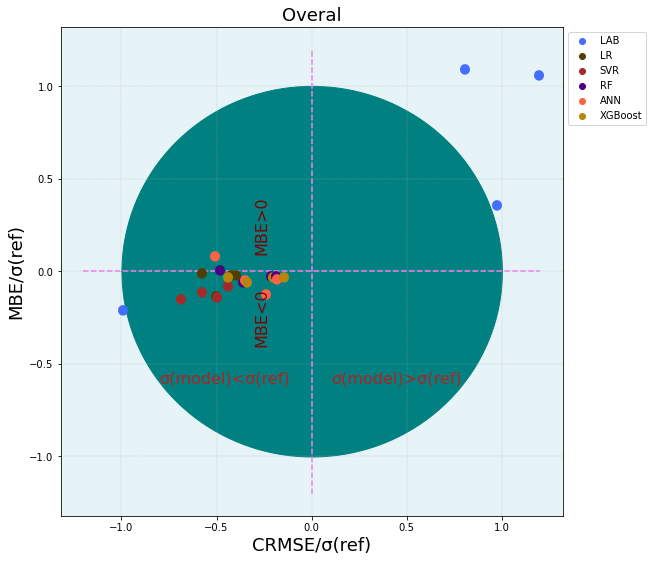

In [126]:
fig= plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
for i in range(4):
    plt.text(CRMSE_LAB[i],MBE_LAB[i] , '•', rotation=90, va='center',fontsize = 36, color='#426eff')
    plt.text(CRMSE_LR[i],MBE_LR[i] , '•', rotation=90, va='center',fontsize = 36, color='#513e00')
    plt.text(CRMSE_SVR[i],MBE_SVR[i] , '•', rotation=90, va='center',fontsize = 36, color='brown')
    plt.text(CRMSE_RF[i],MBE_RF[i] , '•', rotation=90, va='center',fontsize = 36, color='indigo')
    plt.text(CRMSE_ANN[i],MBE_ANN[i] , '•', rotation=90, va='center',fontsize = 36, color='tomato')
    plt.text(CRMSE_XGB[i],MBE_XGB[i] , '•', rotation=90, va='center',fontsize = 36, color='darkgoldenrod')
plt.scatter(CRMSE_LAB[2]-0.2,MBE_LAB[2],color='#426eff')
plt.scatter(CRMSE_LR,MBE_LR,color='#513e00')
plt.scatter(CRMSE_SVR,MBE_SVR,color='brown')
plt.scatter(CRMSE_RF,MBE_RF,color='indigo')
plt.scatter(CRMSE_ANN,MBE_ANN,color='tomato')
plt.scatter(CRMSE_XGB,MBE_XGB,color='darkgoldenrod')
plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (1,1))
plt.vlines([0], -1.2, 1.2, linestyles='dashed',color='violet')
plt.hlines([0], -1.2, 1.2, linestyles='dashed', color='violet')
plt.text(-0.8, -0.6, 'σ(model)<σ(ref)', fontsize = 16, color='firebrick')
plt.text(0.1, -0.6, 'σ(model)>σ(ref)', fontsize = 16, color='firebrick')
plt.text(-0.3, -0.25, 'MBE<0', rotation=90, va='center',fontsize = 16, color='maroon')
plt.text(-0.3, 0.25, 'MBE>0', rotation=90, va='center',fontsize = 16, color='maroon')
plt.fill_between(a, b, color='teal')
plt.xlabel('CRMSE/σ(ref)',fontsize=18)
plt.ylabel('MBE/σ(ref)',fontsize=18)
plt.title('Overal',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

## Feature Importance

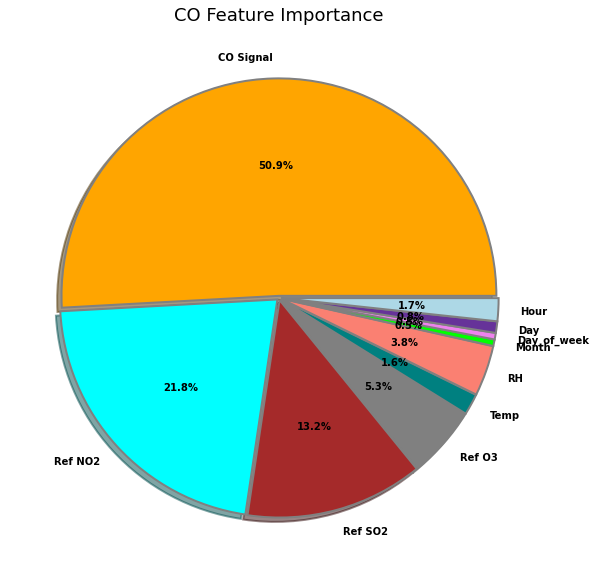

In [127]:
fig= plt.figure(figsize=(10,10))
# T-shirt sales for sizes Small, Medium, and Large
features = features_CO
# wedge labels
lables = 'CO Signal', 'Ref NO2', 'Ref SO2', 'Ref O3', 'Temp', 'RH','Month','Day_of_week','Day','Hour'
# wedge colors
colors = [ "orange", "cyan", "brown", 
          "grey","teal","salmon",'lime','violet','rebeccapurple','lightblue']
# explode the wedge for Small
explode = (0.01, 0.01, 0.01, 0.01,0.01,0.01, 0.01, 0.01,0.01,0.01)
# line properties
wedge_props = {"linewidth": 2, "edgecolor": "grey"}
# text properties
text_props = {"weight": "bold"}

# plot a pie chart
plt.pie(features,
        labels=lables,
        autopct="%1.1f%%",
        colors=colors,
        shadow=True,
        explode=explode,
        wedgeprops=wedge_props,
        textprops=text_props)
plt.title("CO Feature Importance",fontsize=18)
plt.show()

<ipython-input-128-044e4e4b4b25>:17: MatplotlibDeprecationWarning:

normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 



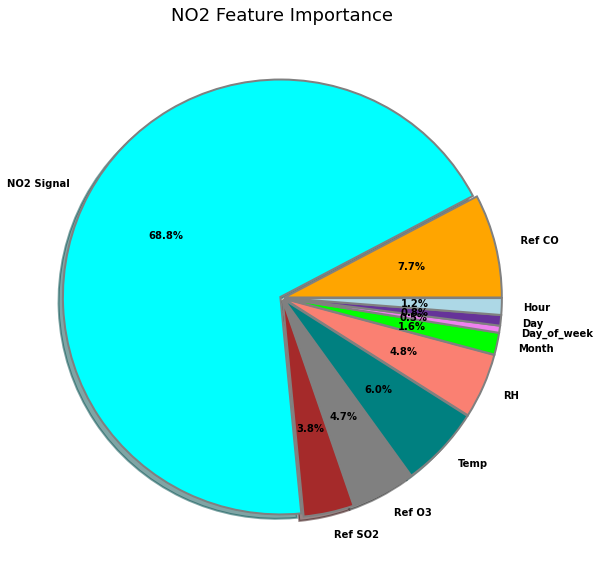

In [128]:
fig= plt.figure(figsize=(10,10))
# T-shirt sales for sizes Small, Medium, and Large
features =features_NO2
# wedge labels
lables = ' Ref CO', 'NO2 Signal', 'Ref SO2', 'Ref O3', 'Temp', 'RH','Month','Day_of_week','Day','Hour'
# wedge colors
colors = [ "orange", "cyan", "brown", 
          "grey","teal","salmon",'lime','violet','rebeccapurple','lightblue']
# explode the wedge for Small
explode = (0.01, 0.01, 0.01, 0.01,0.01,0.01, 0.01, 0.01,0.01,0.01)
# line properties
wedge_props = {"linewidth": 2, "edgecolor": "grey"}
# text properties
text_props = {"weight": "bold"}

# plot a pie chart
plt.pie(features,
        labels=lables,
        autopct="%1.1f%%",
        colors=colors,
        shadow=True,
        explode=explode,
        wedgeprops=wedge_props,
        textprops=text_props)
plt.title("NO2 Feature Importance",fontsize=18)
plt.show()

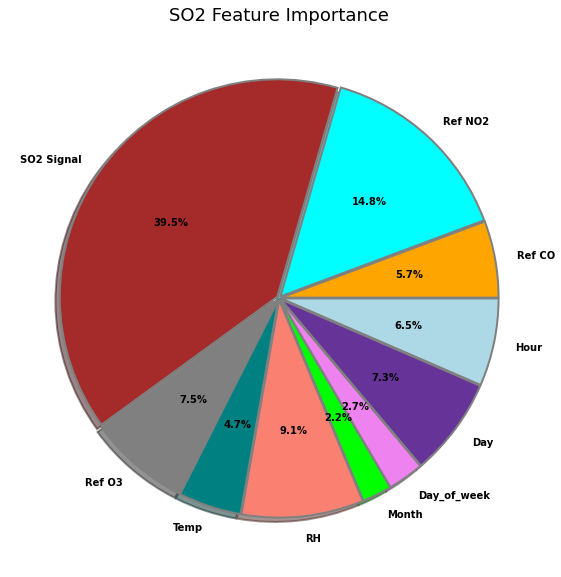

In [129]:
fig= plt.figure(figsize=(10,10))
# T-shirt sales for sizes Small, Medium, and Large
features =features_SO2
# wedge labels
lables = 'Ref CO', 'Ref NO2', 'SO2 Signal', 'Ref O3', 'Temp', 'RH','Month','Day_of_week','Day','Hour'
# wedge colors
colors = [ "orange", "cyan", "brown", 
          "grey","teal","salmon",'lime','violet','rebeccapurple','lightblue']
# explode the wedge for Small
explode = (0.01, 0.01, 0.01, 0.01,0.01,0.01, 0.01, 0.01,0.01,0.01)
# line properties
wedge_props = {"linewidth": 2, "edgecolor": "grey"}
# text properties
text_props = {"weight": "bold"}

# plot a pie chart
plt.pie(features,
        labels=lables,
        autopct="%1.1f%%",
        colors=colors,
        shadow=True,
        explode=explode,
        wedgeprops=wedge_props,
        textprops=text_props)
plt.title("SO2 Feature Importance",fontsize=18)
plt.show()

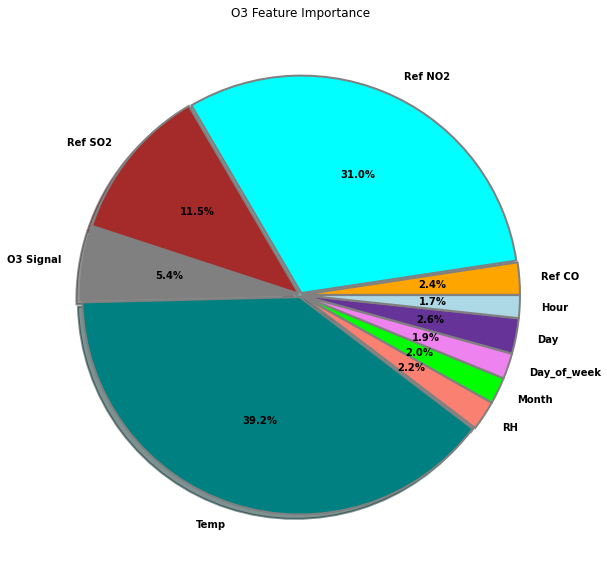

In [130]:
fig= plt.figure(figsize=(10,10))
# T-shirt sales for sizes Small, Medium, and Large
features =features_O3
# wedge labels
lables = 'Ref CO', 'Ref NO2', 'Ref SO2', 'O3 Signal', 'Temp', 'RH','Month','Day_of_week','Day','Hour'
# wedge colors
colors = [ "orange", "cyan", "brown", 
          "grey","teal","salmon",'lime','violet','rebeccapurple','lightblue']
# explode the wedge for Small
explode = (0.01, 0.01, 0.01, 0.01,0.01,0.01, 0.01, 0.01,0.01,0.01)
# line properties
wedge_props = {"linewidth": 2, "edgecolor": "grey"}
# text properties
text_props = {"weight": "bold"}

# plot a pie chart
plt.pie(features,
        labels=lables,
        autopct="%1.1f%%",
        colors=colors,
        shadow=True,
        explode=explode,
        wedgeprops=wedge_props,
        textprops=text_props)
plt.title("O3 Feature Importance")
plt.show()

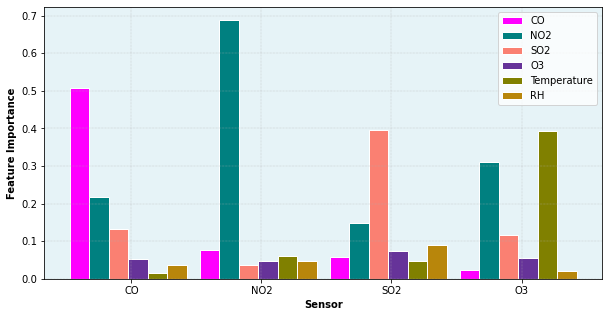

In [131]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(10,5)) 
# set width of bars
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
barWidth = 0.15
 
# set heights of bars
Signal1 = [features_CO[0],features_NO2[0],features_SO2[0],features_O3[0]]
Signal2 = [features_CO[1],features_NO2[1],features_SO2[1],features_O3[1]]
Signal3 = [features_CO[2],features_NO2[2],features_SO2[2],features_O3[2]]
Signal4 = [features_CO[3],features_NO2[3],features_SO2[3],features_O3[3]]
Temp = [features_CO[4],features_NO2[4],features_SO2[4],features_O3[4]]
RH = [features_CO[5],features_NO2[5],features_SO2[5],features_O3[5]]


 
# Set position of bar on X axis
r1 = np.arange(len(Signal1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
 
 
# Make the plot
plt.bar(r1, Signal1, color='magenta', width=barWidth, edgecolor='white', label='CO')
plt.bar(r2, Signal2, color='teal', width=barWidth, edgecolor='white', label='NO2')
plt.bar(r3, Signal3, color='salmon', width=barWidth, edgecolor='white', label='SO2')
plt.bar(r4, Signal4, color='rebeccapurple', width=barWidth, edgecolor='white', label='O3')
plt.bar(r5, Temp, color='olive', width=barWidth, edgecolor='white', label='Temperature')
plt.bar(r6, RH, color='darkgoldenrod', width=barWidth, edgecolor='white', label='RH')
 
# Add xticks on the middle of the group bars
plt.xlabel('Sensor', fontweight='bold')
plt.ylabel('Feature Importance', fontweight='bold')
plt.xticks([r + barWidth+0.25 for r in range(len(Signal1))], ['CO', 'NO2', 'SO2', 'O3'])
 
# Create legend & Show graphic
plt.legend()
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

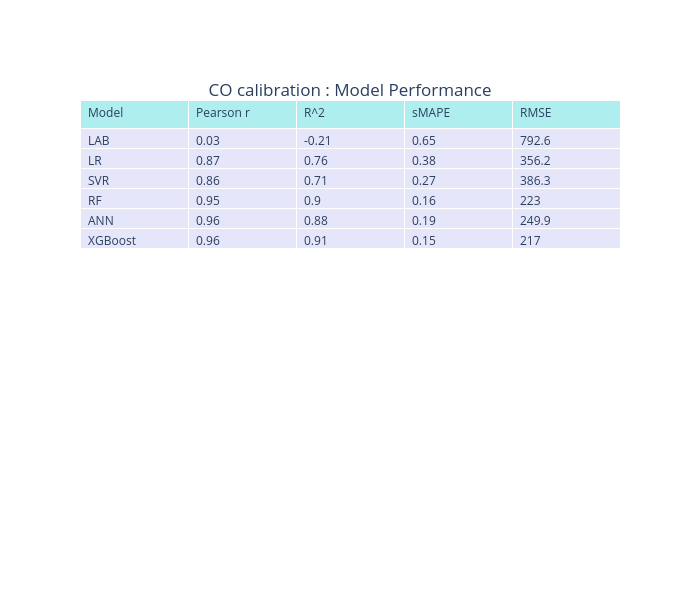

In [132]:
import plotly.graph_objects as go
import pandas as pd
model=['LAB','LR','SVR','RF','ANN','XGBoost']
Pearson=[Pearson_lab_CO,Pearson_lr_CO,Pearson_svr_CO,Pearson_rf_CO,Pearson_ann_CO,Pearson_xgb_CO]
R2=[R2_lab_CO,R2_lr_CO,R2_svr_CO,R2_rf_CO,R2_ann_CO,R2_xgb_CO]
RMSE=[RMSE_Lab_CO,RMSE_Lr_CO,RMSE_Svr_CO,RMSE_Rf_CO,RMSE_Ann_CO,RMSE_Xgb_CO]
sMAPE=[sMAPE_lab_CO,sMAPE_lr_CO,sMAPE_svr_CO,sMAPE_rf_CO,sMAPE_ann_CO,sMAPE_xgb_CO]

fig = go.Figure(data=[go.Table(
    header=dict(values=['Model','Pearson r','R^2','sMAPE','RMSE'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[model,Pearson,R2,sMAPE,RMSE ],
               fill_color='lavender',
               align='left'))
   ])

fig.update_layout(
title={'text': "CO calibration : Model Performance",
        'y':0.86,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
width=700,
height=600,
)
#fig.show()
chart_studio.plotly.sign_in('vinylango', 'gybbJVWfRSUoTcRRSa6J')
chart_studio.plotly.image.save_as(fig, filename='models_performance_CO.png')
Image('models_performance_CO.png')


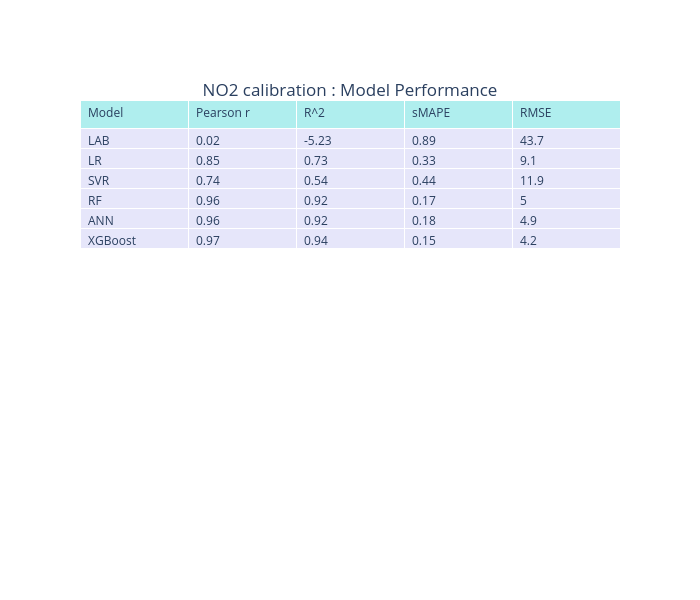

In [133]:
import plotly.graph_objects as go
import pandas as pd
model=['LAB','LR','SVR','RF','ANN','XGBoost']
Pearson=[Pearson_lab_NO2,Pearson_lr_NO2,Pearson_svr_NO2,Pearson_rf_NO2,Pearson_ann_NO2,Pearson_xgb_NO2]
R2=[R2_lab_NO2,R2_lr_NO2,R2_svr_NO2,R2_rf_NO2,R2_ann_NO2,R2_xgb_NO2]
RMSE=[RMSE_Lab_NO2,RMSE_Lr_NO2,RMSE_Svr_NO2,RMSE_Rf_NO2,RMSE_Ann_NO2,RMSE_Xgb_NO2]
sMAPE=[sMAPE_lab_NO2,sMAPE_lr_NO2,sMAPE_svr_NO2,sMAPE_rf_NO2,sMAPE_ann_NO2,sMAPE_xgb_NO2]

fig = go.Figure(data=[go.Table(
    header=dict(values=['Model','Pearson r','R^2','sMAPE','RMSE'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[model,Pearson,R2,sMAPE,RMSE ],
               fill_color='lavender',
               align='left'))
   ])
fig.update_layout(
title={'text': "NO2 calibration : Model Performance",
        'y':0.86,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
width=700,
height=600,

)
chart_studio.plotly.sign_in('vinylango', 'gybbJVWfRSUoTcRRSa6J')
chart_studio.plotly.image.save_as(fig, filename='models_performance_NO2.png')
Image('models_performance_NO2.png')

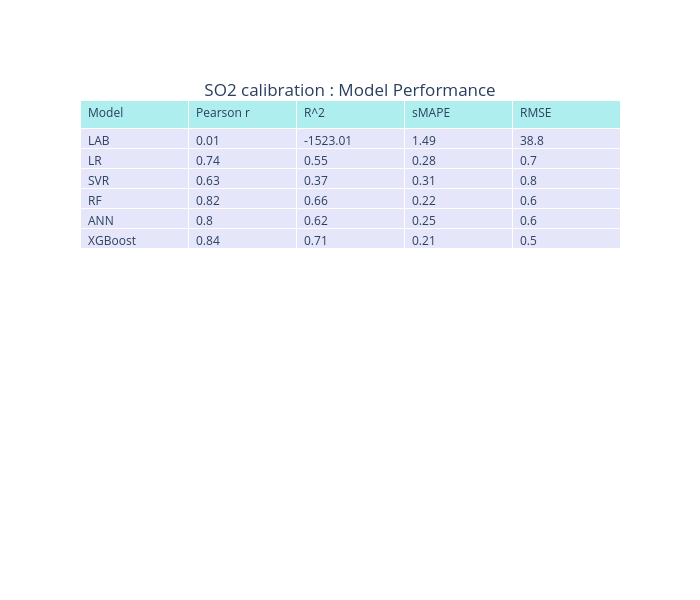

In [134]:
import plotly.graph_objects as go
import pandas as pd
model=['LAB','LR','SVR','RF','ANN','XGBoost']
Pearson=[Pearson_lab_SO2,Pearson_lr_SO2,Pearson_svr_SO2,Pearson_rf_SO2,Pearson_ann_SO2,Pearson_xgb_SO2]
R2=[R2_lab_SO2,R2_lr_SO2,R2_svr_SO2,R2_rf_SO2,R2_ann_SO2,R2_xgb_SO2,]
RMSE=[RMSE_Lab_SO2,RMSE_Lr_SO2,RMSE_Svr_SO2,RMSE_Rf_SO2,RMSE_Ann_SO2,RMSE_Xgb_SO2]
sMAPE=[sMAPE_lab_SO2,sMAPE_lr_SO2,sMAPE_svr_SO2,sMAPE_rf_SO2,sMAPE_ann_SO2,sMAPE_xgb_SO2]

fig = go.Figure(data=[go.Table(
    header=dict(values=['Model','Pearson r','R^2','sMAPE','RMSE'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[model,Pearson,R2,sMAPE,RMSE ],
               fill_color='lavender',
               align='left'))
   ])
fig.update_layout(
title={'text': "SO2 calibration : Model Performance",
        'y':0.86,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
width=700,
height=600,

)
chart_studio.plotly.sign_in('vinylango', 'gybbJVWfRSUoTcRRSa6J')
chart_studio.plotly.image.save_as(fig, filename='models_performance_SO2.png')
Image('models_performance_SO2.png')

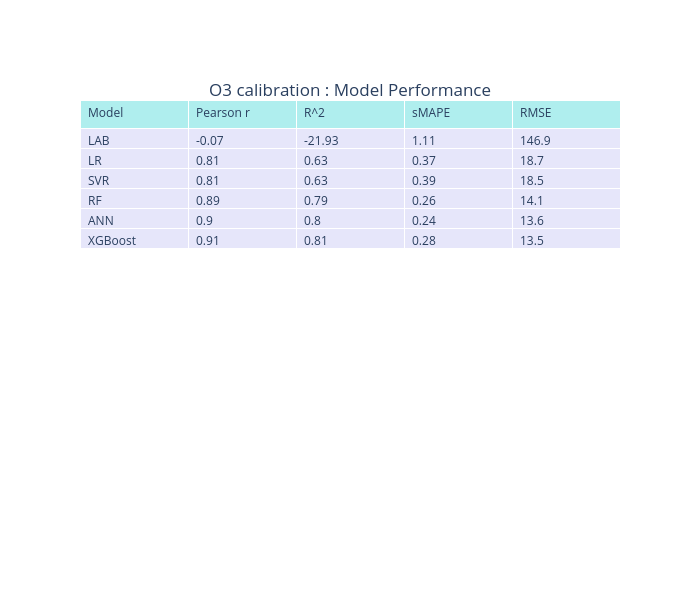

In [135]:
import plotly.graph_objects as go
import pandas as pd
model=['LAB','LR','SVR','RF','ANN','XGBoost']
Pearson=[str(Pearson_lab_O3),Pearson_lr_O3,Pearson_svr_O3,Pearson_rf_O3,Pearson_ann_O3,Pearson_xgb_O3]
R2=[R2_lab_O3,R2_lr_O3,R2_svr_O3,R2_rf_O3,R2_ann_O3,R2_xgb_O3]
RMSE=[RMSE_Lab_O3,RMSE_Lr_O3,RMSE_Svr_O3,RMSE_Rf_O3,RMSE_Ann_O3,RMSE_Xgb_O3]
sMAPE=[sMAPE_lab_O3,sMAPE_lr_O3,sMAPE_svr_O3,sMAPE_rf_O3,sMAPE_ann_O3,sMAPE_xgb_O3]

fig = go.Figure(data=[go.Table(
    header=dict(values=['Model','Pearson r','R^2','sMAPE','RMSE'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[model,Pearson,R2,sMAPE,RMSE ],
               fill_color='lavender',
               align='left'))
   ])
fig.update_layout(
title={'text': "O3 calibration : Model Performance",
        'y':0.86,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
width=700,
height=600,

)
chart_studio.plotly.sign_in('vinylango', 'gybbJVWfRSUoTcRRSa6J')
chart_studio.plotly.image.save_as(fig, filename='models_performance_O3.png')
Image('models_performance_O3.png')

In [136]:
Pearson_lab=np.array([Pearson_lab_CO,Pearson_lab_NO2,Pearson_lab_SO2,Pearson_lab_O3])
Pearson_lr=np.array([Pearson_lr_CO,Pearson_lr_NO2,Pearson_lr_SO2,Pearson_lr_O3])
Pearson_svr=np.array([Pearson_svr_CO,Pearson_svr_NO2,Pearson_svr_SO2,Pearson_svr_O3])
Pearson_rf=np.array([Pearson_rf_CO,Pearson_rf_NO2,Pearson_rf_SO2,Pearson_rf_O3])
Pearson_ann=np.array([Pearson_ann_CO,Pearson_ann_NO2,Pearson_ann_SO2,Pearson_ann_O3])
Pearson_xgb=np.array([Pearson_xgb_CO,Pearson_xgb_NO2,Pearson_xgb_SO2,Pearson_xgb_O3])
R2_lab=np.array([R2_lab_CO,R2_lab_NO2,R2_lab_SO2,R2_lab_O3])
R2_lr=np.array([R2_lr_CO,R2_lr_NO2,R2_lr_SO2,R2_lr_O3])
R2_svr=np.array([R2_svr_CO,R2_svr_NO2,R2_svr_SO2,R2_svr_O3])
R2_rf=np.array([R2_rf_CO,R2_rf_NO2,R2_rf_SO2,R2_rf_O3])
R2_ann=np.array([R2_ann_CO,R2_ann_NO2,R2_ann_SO2,R2_ann_O3])
R2_xgb=np.array([R2_xgb_CO,R2_xgb_NO2,R2_xgb_SO2,R2_xgb_O3])
RMSE_lab=np.array([RMSE_Lab_CO,RMSE_Lab_NO2,RMSE_Lab_SO2,RMSE_Lab_O3])
RMSE_lr=np.array([RMSE_Lr_CO,RMSE_Lr_NO2,RMSE_Lr_SO2,RMSE_Lr_O3])
RMSE_svr=np.array([RMSE_Svr_CO,RMSE_Svr_NO2,RMSE_Svr_SO2,RMSE_Svr_O3])
RMSE_rf=np.array([RMSE_Rf_CO,RMSE_Rf_NO2,RMSE_Rf_SO2,RMSE_Rf_O3])
RMSE_ann=np.array([RMSE_Ann_CO,RMSE_Ann_NO2,RMSE_Ann_SO2,RMSE_Ann_O3])
RMSE_xgb=np.array([RMSE_Xgb_CO,RMSE_Xgb_NO2,RMSE_Xgb_SO2,RMSE_Xgb_O3])
sMAPE_lab=np.array([sMAPE_lab_CO,sMAPE_lab_NO2,sMAPE_lab_SO2,sMAPE_lab_O3])
sMAPE_lr=np.array([sMAPE_lr_CO,sMAPE_lr_NO2,sMAPE_lr_SO2,sMAPE_lr_O3])
sMAPE_svr=np.array([sMAPE_svr_CO,sMAPE_svr_NO2,sMAPE_svr_SO2,sMAPE_svr_O3])
sMAPE_rf=np.array([sMAPE_rf_CO,sMAPE_rf_NO2,sMAPE_rf_SO2,sMAPE_rf_O3])
sMAPE_ann=np.array([sMAPE_ann_CO,sMAPE_ann_NO2,sMAPE_ann_SO2,sMAPE_ann_O3])
sMAPE_xgb=np.array([sMAPE_xgb_CO,sMAPE_xgb_NO2,sMAPE_xgb_SO2,sMAPE_xgb_O3])
Pearson_lab_mean=round(np.mean(Pearson_lab),2)
Pearson_lab_std=round(np.std(Pearson_lab),2)
Pearson_lr_mean=round(np.mean(Pearson_lr),2)
Pearson_lr_std=round(np.std(Pearson_lr),2)
Pearson_svr_mean=round(np.mean(Pearson_svr),2)
Pearson_svr_std=round(np.std(Pearson_svr),2)
Pearson_rf_mean=round(np.mean(Pearson_rf),2)
Pearson_rf_std=round(np.std(Pearson_rf),2)
Pearson_ann_mean=round(np.mean(Pearson_ann),2)
Pearson_ann_std=round(np.std(Pearson_ann),2)
Pearson_xgb_mean=round(np.mean(Pearson_xgb),2)
Pearson_xgb_std=round(np.std(Pearson_xgb),2)
R2_lab_mean=round(np.mean(R2_lab),2)
R2_lab_std=round(np.std(R2_lab),2)
R2_lr_mean=round(np.mean(R2_lr),2)
R2_lr_std=round(np.std(R2_lr),2)
R2_svr_mean=round(np.mean(R2_svr),2)
R2_svr_std=round(np.std(R2_svr),2)
R2_rf_mean=round(np.mean(R2_rf),2)
R2_rf_std=round(np.std(R2_rf),2)
R2_ann_mean=round(np.mean(R2_ann),2)
R2_ann_std=round(np.std(R2_ann),2)
R2_xgb_mean=round(np.mean(R2_xgb),2)
R2_xgb_std=round(np.std(R2_xgb),2)
RMSE_lab_mean=round(np.mean(RMSE_lab),2)
RMSE_lab_std=round(np.std(RMSE_lab),2)
RMSE_lr_mean=round(np.mean(RMSE_lr),2)
RMSE_lr_std=round(np.std(RMSE_lr),2)
RMSE_svr_mean=round(np.mean(RMSE_svr),2)
RMSE_svr_std=round(np.std(RMSE_svr),2)
RMSE_rf_mean=round(np.mean(RMSE_rf),2)
RMSE_rf_std=round(np.std(RMSE_rf),2)
RMSE_ann_mean=round(np.mean(RMSE_ann),2)
RMSE_ann_std=round(np.std(RMSE_ann),2)
RMSE_xgb_mean=round(np.mean(RMSE_xgb),2)
RMSE_xgb_std=round(np.std(RMSE_xgb),2)
sMAPE_lab_mean=round(np.mean(sMAPE_lab),2)
sMAPE_lab_std=round(np.std(sMAPE_lab),2)
sMAPE_lr_mean=round(np.mean(sMAPE_lr),2)
sMAPE_lr_std=round(np.std(sMAPE_lr),2)
sMAPE_svr_mean=round(np.mean(sMAPE_svr),2)
sMAPE_svr_std=round(np.std(sMAPE_svr),2)
sMAPE_rf_mean=round(np.mean(sMAPE_rf),2)
sMAPE_rf_std=round(np.std(sMAPE_rf),2)
sMAPE_ann_mean=round(np.mean(sMAPE_ann),2)
sMAPE_ann_std=round(np.std(sMAPE_ann),2)
sMAPE_xgb_mean=round(np.mean(sMAPE_xgb),2)
sMAPE_xgb_std=round(np.std(sMAPE_xgb),2)

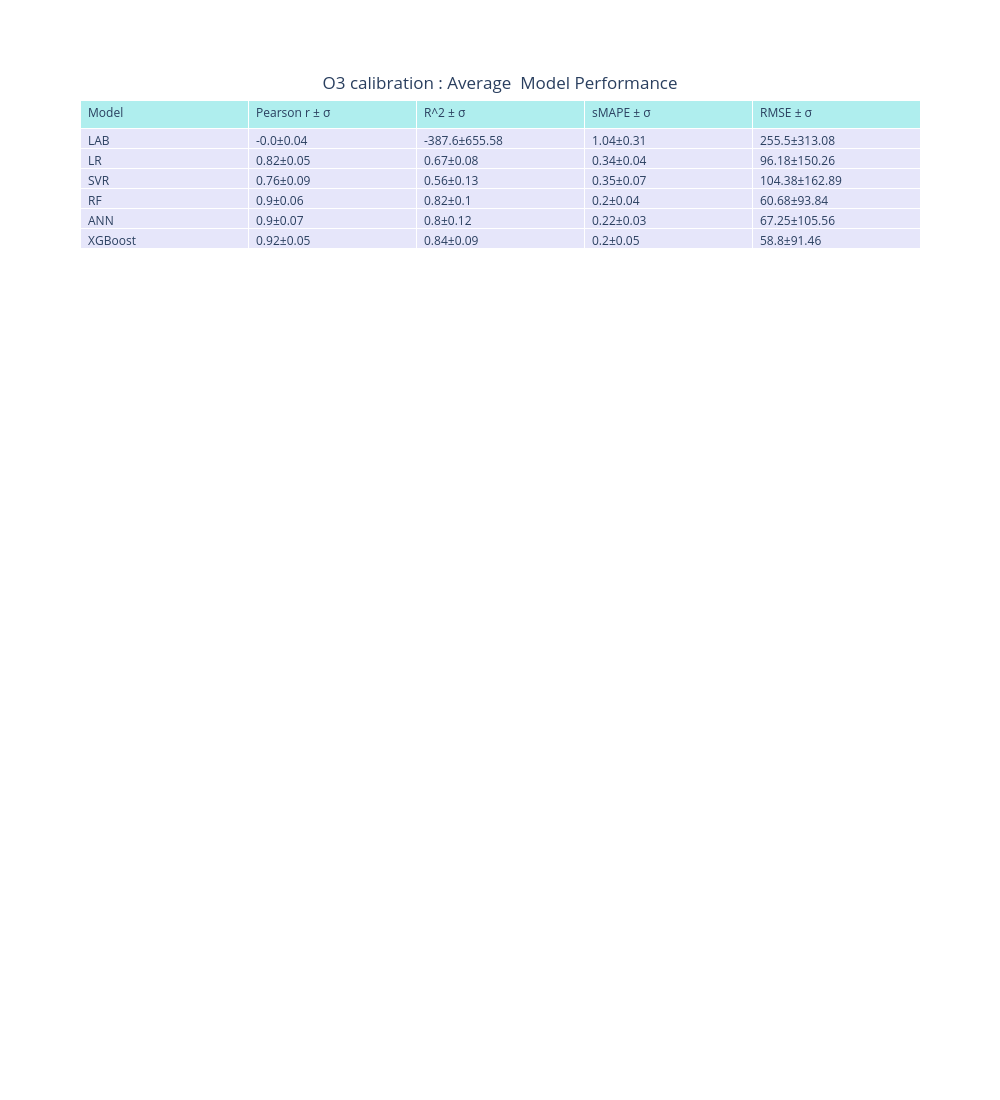

In [137]:
import plotly.graph_objects as go
import pandas as pd
model=['LAB','LR','SVR','RF','ANN','XGBoost']
Pearson=[str(Pearson_lab_mean)+ '±' +str(Pearson_lab_std),str(Pearson_lr_mean)+ '±' +str(Pearson_lr_std),
         str(Pearson_svr_mean)+ '±' +str(Pearson_svr_std),str(Pearson_rf_mean)+ '±' +str(Pearson_rf_std),
         str(Pearson_ann_mean)+ '±' +str(Pearson_ann_std),str(Pearson_xgb_mean)+ '±' +str(Pearson_xgb_std)]


R2=[str(R2_lab_mean)+ '±' +str(R2_lab_std),str(R2_lr_mean)+ '±' +str(R2_lr_std),
    str(R2_svr_mean)+ '±' +str(R2_svr_std),str(R2_rf_mean)+ '±' +str(R2_rf_std),
    str(R2_ann_mean)+ '±' +str(R2_ann_std),str(R2_xgb_mean)+ '±' +str(R2_xgb_std)]



RMSE=[str(RMSE_lab_mean)+ '±' +str(RMSE_lab_std),str(RMSE_lr_mean)+ '±' +str(RMSE_lr_std),
      str(RMSE_svr_mean)+ '±' +str(RMSE_svr_std),str(RMSE_rf_mean)+ '±' +str(RMSE_rf_std),
     str(RMSE_ann_mean)+ '±' +str(RMSE_ann_std),str(RMSE_xgb_mean)+ '±' +str(RMSE_xgb_std)]


sMAPE=[str(sMAPE_lab_mean)+ '±' +str(sMAPE_lab_std),str(sMAPE_lr_mean)+ '±' +str(sMAPE_lr_std),
       str(sMAPE_svr_mean)+ '±' +str(sMAPE_svr_std),str(sMAPE_rf_mean)+ '±' +str(sMAPE_rf_std),
       str(sMAPE_ann_mean)+ '±' +str(sMAPE_ann_std),str(sMAPE_xgb_mean)+ '±' +str(sMAPE_xgb_std)]

fig = go.Figure(data=[go.Table(
    header=dict(values=['Model','Pearson r ± σ','R^2 ± σ ','sMAPE ± σ','RMSE ± σ'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[model,Pearson,R2,sMAPE,RMSE ],
               fill_color='lavender',
               align='left'))
   ])
fig.update_layout(
title={'text': "O3 calibration : Average  Model Performance",
        'y':0.93,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
width=1000,
height=1100,

)
chart_studio.plotly.sign_in('vinylango', 'gybbJVWfRSUoTcRRSa6J')
chart_studio.plotly.image.save_as(fig, filename='models_performance_O3.png')
Image('models_performance_O3.png')